### Problem statement:-

In this project, the objective is set to predict the fraudulent in the credit card transaction using different machine learning models for having a comparative and competitive results. This is very important for the banks and customers since fanatical loss and gains are directly involved in the said matter. The banks cannot entertain loss instead of making profit and cannot let their customers’ money go to fraudsters. Every fraud is considered as a loss for a bank because the bank is responsible for the fraud transactions.

The transactions in the given dataset have been made within a period of two days in September 2013 by some European credit cardholders. It is found that the dataset is highly imbalanced. The positive class (frauds) are present by 0.172% only. 



##The whole work is the summation of the following steps
1. Fetching Data, understanding Data and visualization of the data
2. Data Preparation for modelling
3. Building different models
4. Evaluation of the models


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

# EDA part

## Fetching and understanding the data

In [ ]:
# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#observe the different feature type present in the data

#Number of Rows and Colimn in Dtataset
print("Number of Rows and Columns-->",df.shape)

#variable type
print("\n", df.dtypes)

Number of Rows and Columns--> (284807, 31)

 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [ ]:
# EDA-summary of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#Checking Descriptive Statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Treating Null Values

#### Treating Null Values in Columns

In [ ]:
# Cheking percent of missing values in columns
df_null_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_null_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


It is seen that no column contains the null value. So, any further action is not required.

### Here distribution of our classes is observe

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


It is seen that there is only 0.17% frauds. So the class is imbalanced.

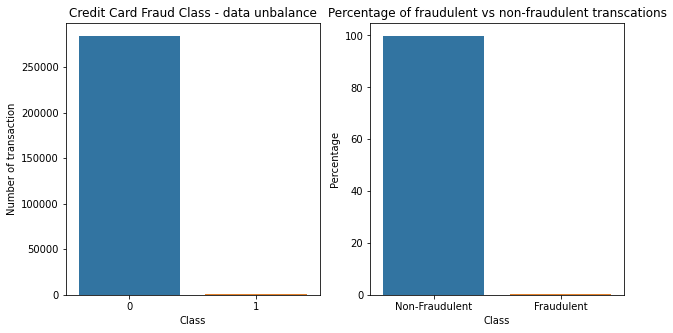

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()

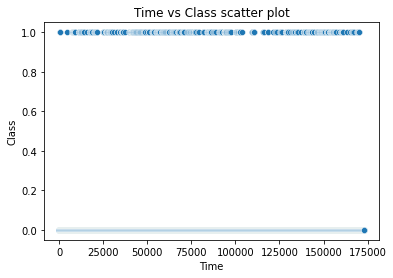

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(df["Time"], df["Class"])
plt.title("Time vs Class scatter plot")
plt.show()

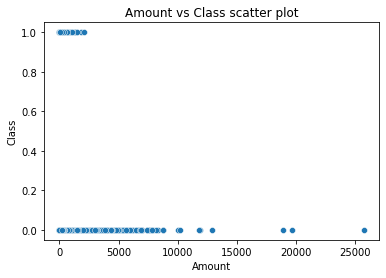

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df["Amount"], df["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

##### Analysis
No specific pattern for the fraudulent and non-fraudulent transctions with respect to Time is found, so `Time` column can be dropped.

It is seen that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

In [ ]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

### Observe the distribution of classes with amount

## Train-Test Split

In [ ]:
y= df["Class"]
X = df.drop("Class", axis = 1)

In [ ]:
from sklearn import model_selection
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state = 42)
#X_train, X_test, y_train, y_test = 

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

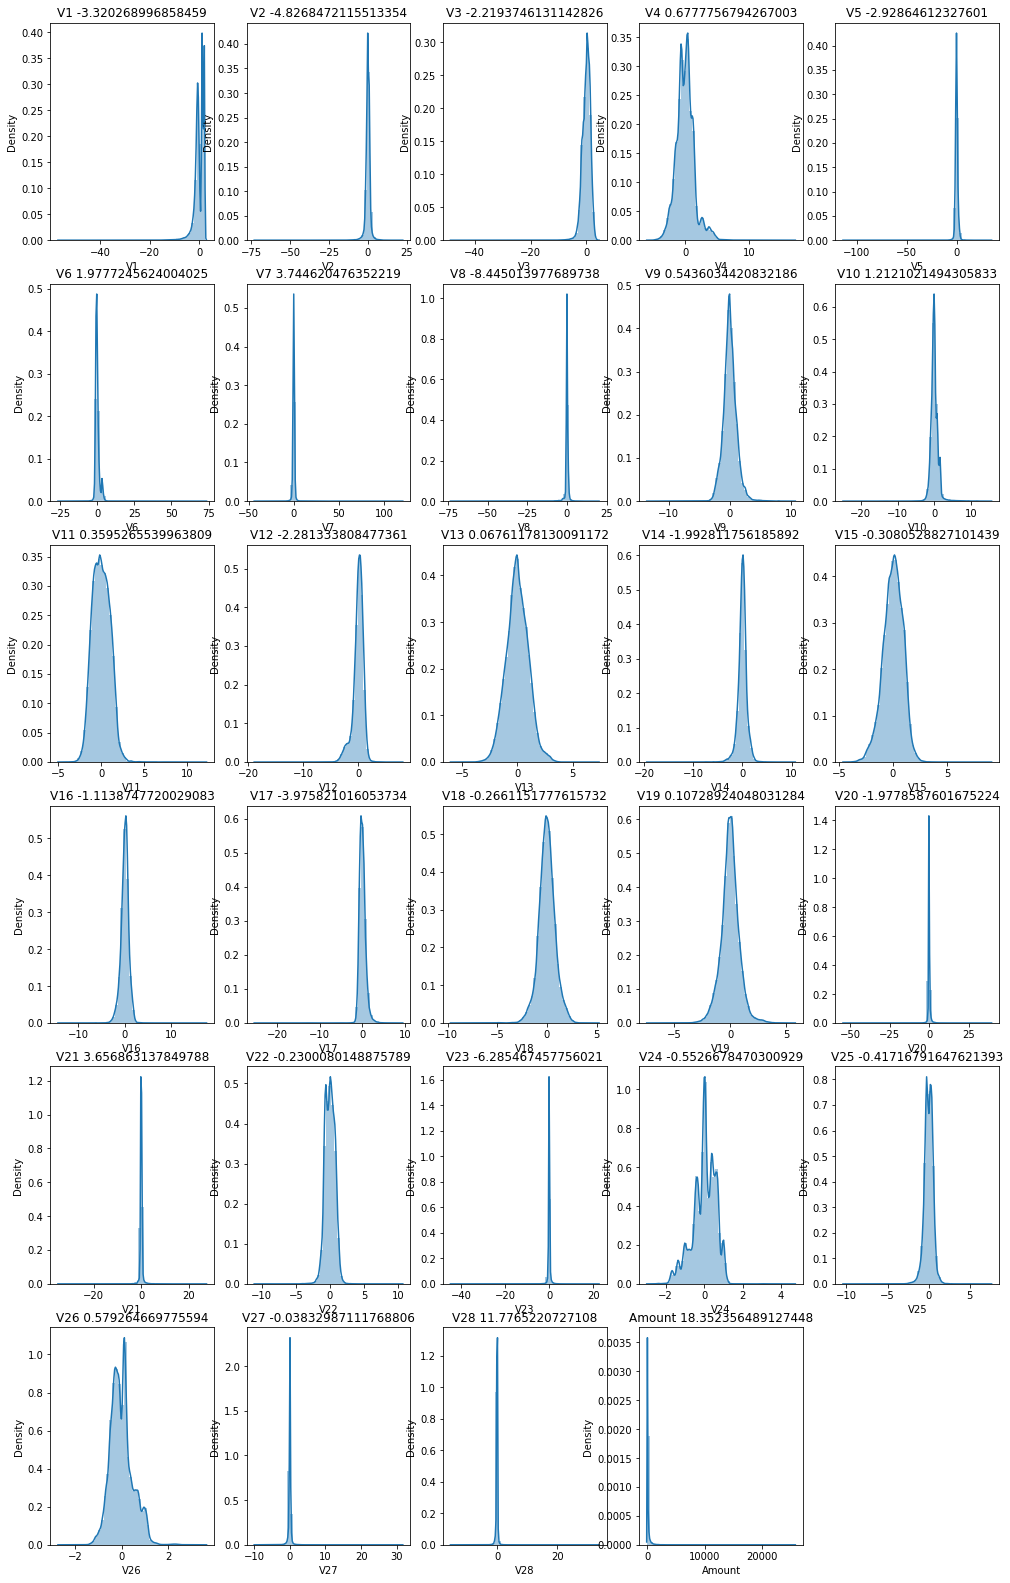

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
k=0
plt.figure(figsize=(17,28))
for col in ( X_train.columns) :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

### There is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[X_train.columns] = pt.fit_transform(X_train)

In [ ]:
X_test[X_train.columns] = pt.transform(X_test)

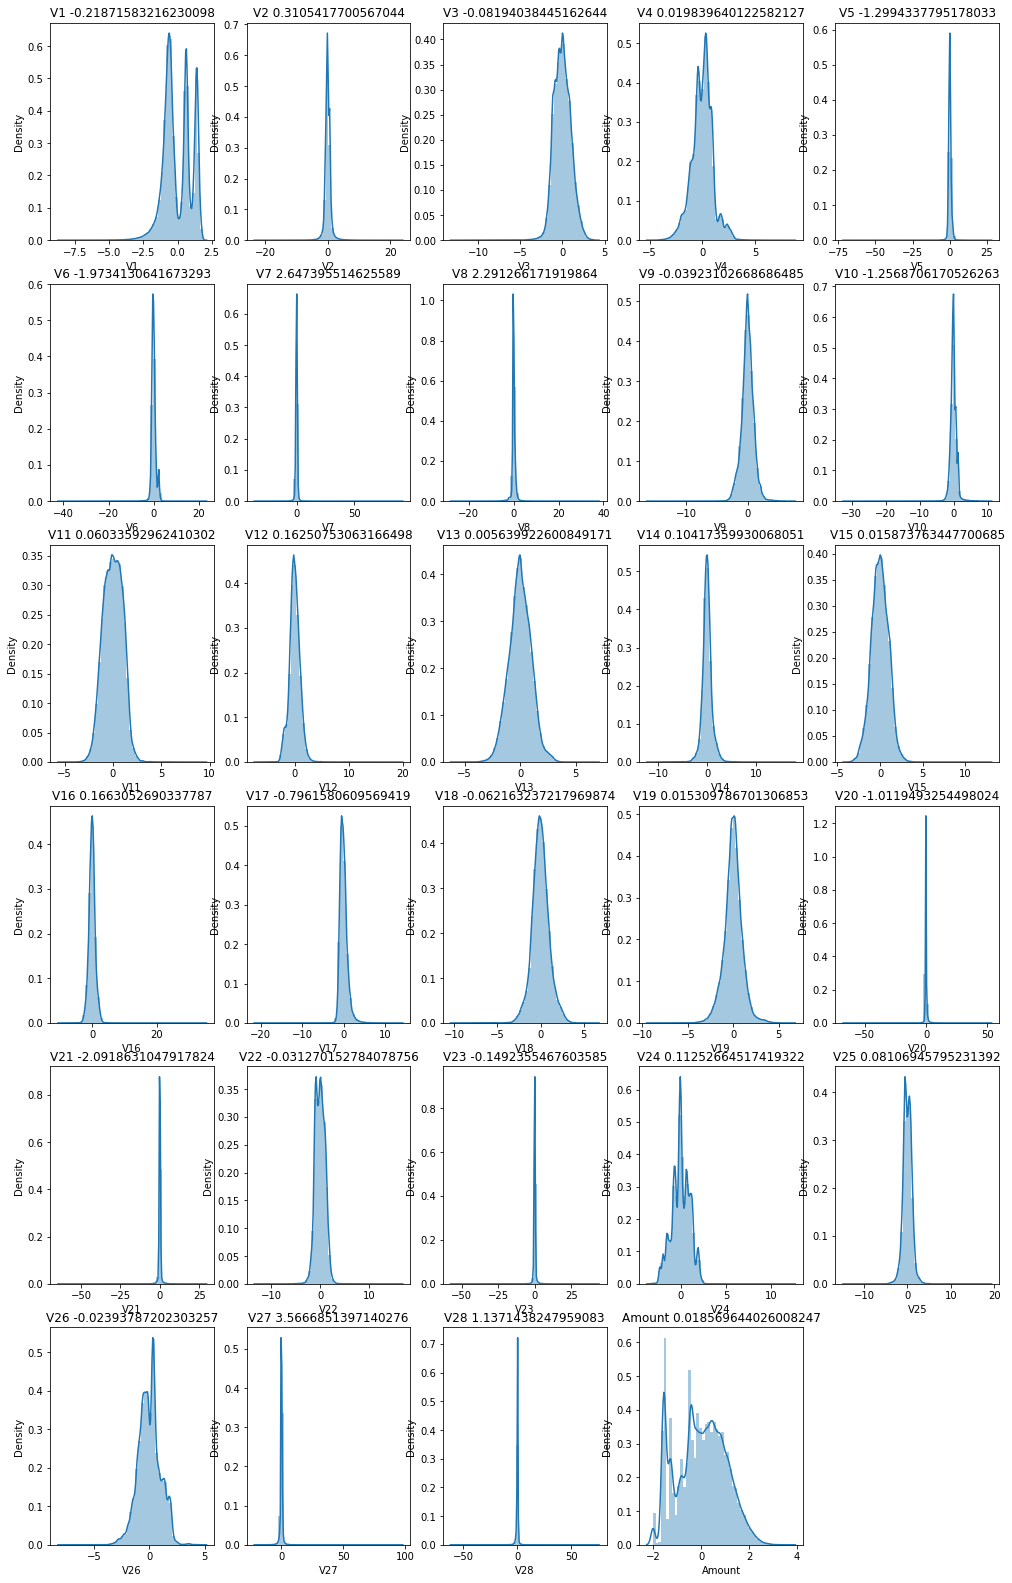

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 
k=0
plt.figure(figsize=(17,28))
for col in X_train.columns :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

Now we can see that all the variables are normally distributed after the transformation.

# Model building with imbalanced data

### Metric selection for highly imbalanced data
As it has been seen that the data is highly imbalanced, and so, only 0.17% transactions are fraudulent, So, Accuracy will not be the good measure for evaluating the model. As the positive class is very few, it may not be impacted due to wrong prediction. 

So, ROC- AUC score is a good alternative. The ROC curve is used to indicate the goodness of the all most all classification model by evaluating the performance of the model at different classification thresholds. The threshold is 0.5 by default which does not work all time, the best threshold is considered to be the one at which the TPR is high and FPR is low, i.e., misclassifications are low. Having determined the optimal threshold, the F1 score is calculated for the classifier to measure the precision and recall at the selected threshold.


In [ ]:
#DataFrame for Merics to be used for comparative study
Train_scr_df=pd.DataFrame({'Metrics':['Accuracy','Sensitivity','Specificity','F1-Score','ROC']})
Test_scr_df=pd.DataFrame({'Metrics':['Accuracy','Sensitivity','Specificity','F1-Score','ROC']})


Train_scr_df_us=pd.DataFrame({'Metrics':['Accuracy','Sensitivity','Specificity','F1-Score','ROC']})
Test_scr_df_us=pd.DataFrame({'Metrics':['Accuracy','Sensitivity','Specificity','F1-Score','ROC']})


Train_scr_df_os=pd.DataFrame({'Metrics':['Accuracy','Sensitivity','Specificity','F1-Score','ROC']})
Test_scr_df_os=pd.DataFrame({'Metrics':['Accuracy','Sensitivity','Specificity','F1-Score','ROC']})


Train_scr_df_sm=pd.DataFrame({'Metrics':['Accuracy','Sensitivity','Specificity','F1-Score','ROC']})
Test_scr_df_sm=pd.DataFrame({'Metrics':['Accuracy','Sensitivity','Specificity','F1-Score','ROC']})


Train_scr_df_Adasyn=pd.DataFrame({'Metrics':['Accuracy','Sensitivity','Specificity','F1-Score','ROC']})
Test_scr_df_Adasyn=pd.DataFrame({'Metrics':['Accuracy','Sensitivity','Specificity','F1-Score','ROC']})


#### The reason why SVM not taken in account:
This dataset contains huge number of records (284807) which will increase after oversampling and SVM is not efficient enough to handle very large number od datapoints due to the requirement of high computational power and resources. In order to make the transformation. When cross validation with k-fold is performed along with hyperparameter tunning, the system almost fails to work. Hence SVM algo has been kept aside.

For the same reason Random forest was also not tried for model building in few of the hyperparameter tuning for oversampling technique.

#### Why KNN is not cosidered for model building?
KNN algorithm is not memory efficient; because model needs to store all the datapoints during computation, usage of memory increases with time. It becomes very slow. It is computationally expensive because the algo proceeds to calculated the distance between two data points with all possible combinatorics. 

### Logistic regression

In [ ]:
# Logistic Regression
#from sklearn import linear_model #import the package

from sklearn.linear_model import LogisticRegression

# Importing packages for metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#Importing packages for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.984255,0.032340,0.032405,0.003108,0.01,{'C': 0.01},0.965597,0.989112,0.990905,0.970731,0.981168,0.979503,0.009954,1,0.986505,0.980858,0.979989,0.985983,0.980297,0.982726,0.002890
1,1.333660,0.072384,0.031455,0.001330,0.1,{'C': 0.1},0.968085,0.985226,0.988491,0.968292,0.980518,0.978122,0.008498,2,0.984784,0.979469,0.979000,0.985303,0.979951,0.981702,0.002750
2,1.423692,0.116228,0.030587,0.000204,1,{'C': 1},0.969063,0.984216,0.987331,0.967060,0.979860,0.977506,0.008093,3,0.983918,0.978808,0.978535,0.984911,0.979587,0.981152,0.002705
3,1.395984,0.086892,0.033477,0.005367,10,{'C': 10},0.969181,0.984110,0.987175,0.966902,0.979759,0.977425,0.008049,4,0.983809,0.978725,0.978481,0.984857,0.979537,0.981082,0.002698
4,1.416596,0.094920,0.030708,0.000235,100,{'C': 100},0.969191,0.984098,0.987160,0.966884,0.979751,0.977417,0.008045,5,0.983798,0.978715,0.978476,0.984851,0.979532,0.981075,0.002697
5,1.436510,0.077513,0.031260,0.000944,1000,{'C': 1000},0.969193,0.984095,0.987160,0.966882,0.979751,0.977416,0.008045,6,0.983797,0.978714,0.978475,0.984851,0.979531,0.981074,0.002698


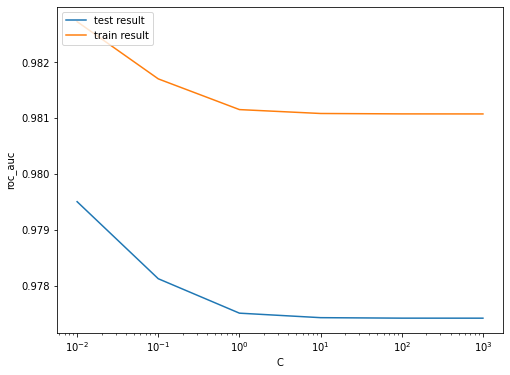

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with the best value of C
best_scr = model_cv.best_score_
best_C_val = model_cv.best_params_['C']

print(f" The highest test roc_auc found: {best_scr} at C = {best_C_val}")

 The highest test roc_auc found: 0.9795025126082126 at C = 0.01


#### Logistic regression with optimal C

In [ ]:
# Instantiating the model with the best value of C
logistic_imbalanced = LogisticRegression(C=0.01)

In [ ]:
# Fitting the model on the train set
logistic_imbalanced_model = logistic_imbalanced.fit(X_train, y_train)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_predicted = logistic_imbalanced_model.predict(X_train)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train, y_train_predicted)
print(conf_mat)

[[227424     27]
 [   151    243]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_train, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train, y_train_predicted)
print("F1-Score is:-", f1_score(y_train, y_train_predicted))



Accuracy:- 0.9992187671443306
Sensitivity:- 0.616751269035533
Specificity:- 0.9998812931136817
F1-Score is:- 0.7319277108433735


In [ ]:
# classification_report
print(classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.62      0.73       394

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



##### ROC on the train set

In [ ]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# Predicted probability
y_train_predicted_proba = logistic_imbalanced_model.predict_proba(X_train)[:,1]

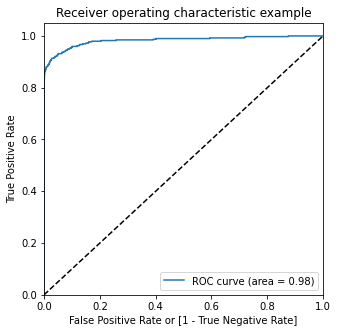

array([1.55209995e-04, 3.70783748e-04, 4.06357255e-04, ...,
       3.89211197e-04, 9.81741287e-06, 1.84358951e-04])

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_predicted_proba)
y_train_predicted_proba

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_train, y_train_predicted_proba)
print("ROC-AUC found on the train set",ROC_auc_var)

ROC-AUC found on the train set 0.9825573297462831


In [ ]:
Train_scr_df['Logistic Regression']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]


#### Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_predicted = logistic_imbalanced_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_predicted)
print(conf_mat)

[[56855     9]
 [   41    57]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.9991222218320986
Sensitivity:- 0.5816326530612245
Specificity:- 0.9998417276308385
F1-Score is:- 0.6951219512195121


In [ ]:
# classification_report
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



##### ROC on the test set

In [ ]:
# Predicted probability
y_test_predicted_proba = logistic_imbalanced_model.predict_proba(X_test)[:,1]

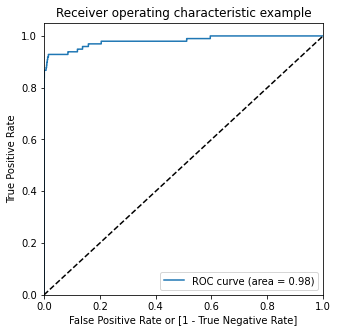

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set",ROC_auc_var)

ROC-AUC found on the test set 0.9806889764909903


In [ ]:
Test_scr_df['Logistic Regression']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]


***Model summary & Comparative Study***

In [ ]:
print("Train Set \n",Train_scr_df)
print("\n\n")
print("Test Set \n",Test_scr_df)

Train Set 
        Metrics  Logistic Regression
0     Accuracy             0.999219
1  Sensitivity             0.616751
2  Specificity             0.999881
3     F1-Score             0.731928
4          ROC             0.982557



Test Set 
        Metrics  Logistic Regression
0     Accuracy             0.999122
1  Sensitivity             0.581633
2  Specificity             0.999842
3     F1-Score             0.695122
4          ROC             0.980689


Overall, the model is performing well in the test set, what it had learnt from the train set.

### XGBoost

In [ ]:
# Importing XGBoost
from xgboost import XGBClassifier

##### Tuning the hyperparameters

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator= xgb_model, 
                        param_grid= param_grid, 
                        scoring= 'roc_auc', 
                        cv= folds, 
                        verbose= 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_result = pd.DataFrame(model_cv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,37.833877,0.219647,0.415417,0.009811,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.972622,0.973489,0.977180,0.974430,0.001976,3,0.999683,0.999816,0.999653,0.999717,0.000071
1,47.234846,0.127635,0.408721,0.006838,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.978473,0.973756,0.985640,0.979290,0.004886,2,0.999955,0.999963,0.999896,0.999938,0.000030
2,51.009572,2.808638,0.417520,0.007806,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.982187,0.971895,0.988788,0.980957,0.006951,1,0.999910,0.999895,0.999912,0.999906,0.000008
3,37.964346,1.016390,0.423376,0.004600,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.966034,0.961730,0.984679,0.970815,0.009960,6,0.999980,0.999998,0.999862,0.999946,0.000060
4,50.746292,2.854859,0.459708,0.056555,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.967480,0.967638,0.982626,0.972582,0.007103,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,50.125286,1.161149,0.606689,0.263030,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.976385,0.956182,0.984677,0.972415,0.011967,5,1.000000,1.000000,1.000000,1.000000,0.000000


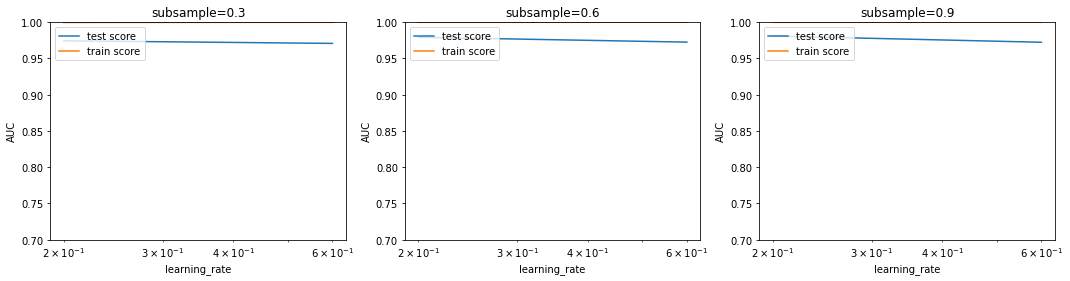

In [ ]:
# # plotting
plt.figure(figsize=(18,4))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_result[cv_result['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.70, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [ ]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imbalanced_model = XGBClassifier(params = params)
xgb_imbalanced_model.fit(X_train, y_train)

XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_predicted = xgb_imbalanced_model.predict(X_train)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train, y_train_predicted)
print(conf_mat)

[[227440     11]
 [    66    328]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_train, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train, y_train_predicted)
print("F1-Score is:-", f1_score(y_train, y_train_predicted))

Accuracy:- 0.9996620509556936
Sensitivity:- 0.8324873096446701
Specificity:- 0.9999516379352036
F1-Score is:- 0.8949522510231923


In [ ]:
# classification_report
print(classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.97      0.83      0.89       394

    accuracy                           1.00    227845
   macro avg       0.98      0.92      0.95    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
# Predicted probability
y_train_pred_proba_imb_xgboost = xgb_imbalanced_model.predict_proba(X_train)[:,1]

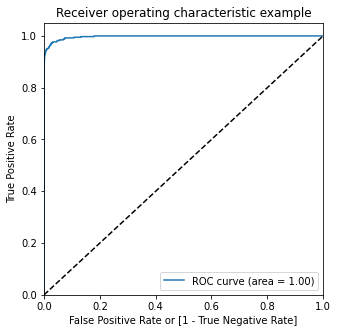

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgboost)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgboost)
print("ROC-AUC found on the train set",ROC_auc_var)

ROC-AUC found on the train set 0.9972034697404676


In [ ]:
Train_scr_df['XGBoost']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]


##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_predicted = xgb_imbalanced_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_predicted)
print(conf_mat)

[[56858     6]
 [   18    80]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.9995786664794073
Sensitivity:- 0.8163265306122449
Specificity:- 0.9998944850872257
F1-Score is:- 0.8695652173913043


In [ ]:
# classification_report
print(classification_report(y_test, y_test_predicted))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predicted probability
y_test_predicted_proba = xgb_imbalanced_model.predict_proba(X_test)[:,1]

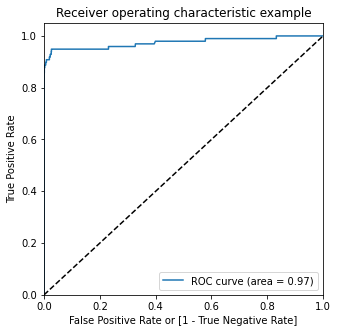

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set",ROC_auc_var)

ROC-AUC found on the test set 0.9747159890264491


In [ ]:
Test_scr_df['XGBoost']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]


***Model summary & Comarative Study***


In [ ]:
print("Train Set \n",Train_scr_df)
print("\n\n")
print("Test Set \n",Test_scr_df)

Train Set 
        Metrics  Logistic Regression   XGBoost
0     Accuracy             0.999219  0.999662
1  Sensitivity             0.616751  0.832487
2  Specificity             0.999881  0.999952
3     F1-Score             0.731928  0.894952
4          ROC             0.982557  0.997203



Test Set 
        Metrics  Logistic Regression   XGBoost
0     Accuracy             0.999122  0.999579
1  Sensitivity             0.581633  0.816327
2  Specificity             0.999842  0.999894
3     F1-Score             0.695122  0.869565
4          ROC             0.980689  0.974716



Overall, the model is performing well in the test set, what it had learnt from the train set.

### Decision Tree

In [ ]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dec_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator= dec_tree, 
                           param_grid= param_grid, 
                           scoring= 'roc_auc',
                           cv= 3, 
                           verbose= 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_result= pd.DataFrame(grid_search.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.250687,0.070362,0.033040,0.005833,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912642,0.927341,0.951705,0.930563,0.016109,5
1,4.162249,0.012042,0.028806,0.000344,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912624,0.927349,0.951703,0.930559,0.016115,6
2,4.150887,0.021127,0.029063,0.001096,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,2
3,4.128995,0.013889,0.028117,0.000190,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,2
4,8.173387,0.033599,0.032122,0.000672,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.934918,0.923800,0.915718,0.924812,0.007871,8
5,8.424553,0.190641,0.035247,0.005588,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.934888,0.931269,0.915745,0.927301,0.008304,7
6,8.803828,1.020481,0.031469,0.000477,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.963203,0.930653,0.915651,0.936502,0.019849,1
7,8.156451,0.079873,0.031381,0.000469,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.955855,0.930684,0.908136,0.931558,0.019491,4


In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9365023155989114
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [ ]:
# Model with optimal hyperparameters
dt_imbalanced_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imbalanced_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_predicted = dt_imbalanced_model.predict(X_train)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train, y_train)
print(conf_mat)

[[227451      0]
 [     0    394]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_train, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train, y_train_predicted)
print("F1-Score is:-", f1_score(y_train, y_train_predicted))

Accuracy:- 0.999100265531392
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score is:- 0.7233468286099864


In [ ]:
# classification_report
print(classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.77      0.68      0.72       394

    accuracy                           1.00    227845
   macro avg       0.89      0.84      0.86    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
# Predicted probability
y_train_predicted_proba = dt_imbalanced_model.predict_proba(X_train)[:,1]

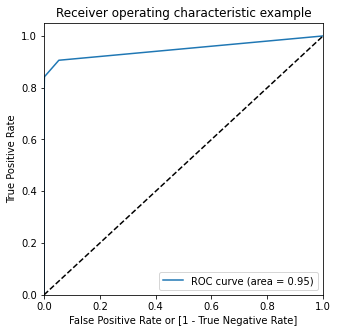

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_predicted_proba)


In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_train, y_train_predicted_proba)
print("ROC-AUC found on the train set",ROC_auc_var)

ROC-AUC found on the train set 0.9486790003545584


In [ ]:
Train_scr_df['Decision Tree']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_predicted = dt_imbalanced_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_predicted)
print(conf_mat)

[[56839    25]
 [   29    69]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.9990519995786665
Sensitivity:- 0.7040816326530612
Specificity:- 0.9995603545301069
F1-Score is:- 0.71875


In [ ]:
# classification_report
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.70      0.72        98

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predicted probability
y_test_predicted_proba = dt_imbalanced_model.predict_proba(X_test)[:,1]

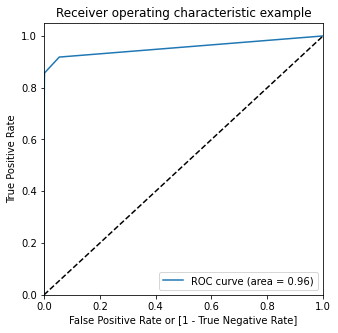

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set",ROC_auc_var)

ROC-AUC found on the test set 0.9550532491415248


In [ ]:
Test_scr_df['Decision Tree']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

***Model summary & Comparative Study***


In [ ]:
print("Train Set \n",Train_scr_df)
print("\n\n")
print("Test Set \n",Test_scr_df)

Train Set 
        Metrics  Logistic Regression   XGBoost  Decision Tree
0     Accuracy             0.999219  0.999662       0.999100
1  Sensitivity             0.616751  0.832487       1.000000
2  Specificity             0.999881  0.999952       1.000000
3     F1-Score             0.731928  0.894952       0.723347
4          ROC             0.982557  0.997203       0.948679



Test Set 
        Metrics  Logistic Regression   XGBoost  Decision Tree
0     Accuracy             0.999122  0.999579       0.999052
1  Sensitivity             0.581633  0.816327       0.704082
2  Specificity             0.999842  0.999894       0.999560
3     F1-Score             0.695122  0.869565       0.718750
4          ROC             0.980689  0.974716       0.955053


### Random forest

In [ ]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rnd_f = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rnd_f, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('Accuracy:-',grid_search.best_score_,'using',grid_search.best_params_)

Accuracy:- 0.9991880445617121 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


In [ ]:
# model with the best hyperparameters

rfc_imbalanced_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [ ]:
# Fit the model
rfc_imbalanced_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_predicted = rfc_imbalanced_model.predict(X_train)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train, y_train)
print(conf_mat)

[[227451      0]
 [     0    394]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_train, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train, y_train_predicted)
print("F1-Score is:-", f1_score(y_train, y_train_predicted))

Accuracy:- 0.9993109350655051
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score is:- 0.7858117326057298


In [ ]:
# classification_report
print(classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.85      0.73      0.79       394

    accuracy                           1.00    227845
   macro avg       0.92      0.87      0.89    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
# Predicted probability
y_train_predicted_proba = rfc_imbalanced_model.predict_proba(X_train)[:,1]

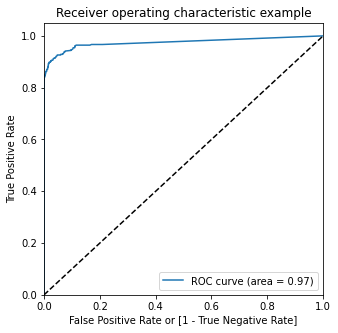

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set",ROC_auc_var)

ROC-AUC found on the test set 0.9550532491415248


In [ ]:
Train_scr_df['Random Forest']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_predicted = rfc_imbalanced_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_predicted)
print(conf_mat)

[[56851    13]
 [   27    71]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.9992977774656788
Sensitivity:- 0.7244897959183674
Specificity:- 0.9997713843556556
F1-Score is:- 0.7802197802197802


In [ ]:
# classification_report
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.72      0.78        98

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predicted probability
y_test_predicted_proba = rfc_imbalanced_model.predict_proba(X_test)[:,1]

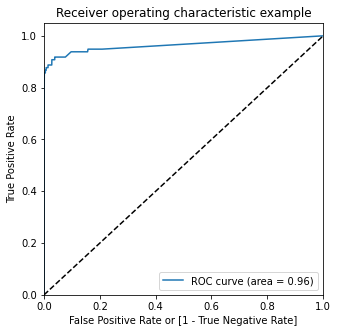

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set",ROC_auc_var)

ROC-AUC found on the test set 0.9648245042952466


In [ ]:
Test_scr_df['Random Forest']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

***Model summary & Comparative Study***


In [ ]:
print("Train Set \n",Train_scr_df)
print("\n\n")
print("Test Set \n",Test_scr_df)

Train Set 
        Metrics  Logistic Regression   XGBoost  Decision Tree  Random Forest
0     Accuracy             0.999219  0.999662       0.999100       0.999311
1  Sensitivity             0.616751  0.832487       1.000000       1.000000
2  Specificity             0.999881  0.999952       1.000000       1.000000
3     F1-Score             0.731928  0.894952       0.723347       0.785812
4          ROC             0.982557  0.997203       0.948679       0.955053



Test Set 
        Metrics  Logistic Regression   XGBoost  Decision Tree  Random Forest
0     Accuracy             0.999122  0.999579       0.999052       0.999298
1  Sensitivity             0.581633  0.816327       0.704082       0.724490
2  Specificity             0.999842  0.999894       0.999560       0.999771
3     F1-Score             0.695122  0.869565       0.718750       0.780220
4          ROC             0.980689  0.974716       0.955053       0.964825


### Selecting best model on the imbalanced data

It is seen that the performances of Ligistic Regression and XGBoost are slightly better than the other models if all are evaluated in terms of ROC curve.

Now, as it is required to select only one model, it is better to select the XGBoost which gives us ROC score of .99.0 on the train data and 0.97 on the test data.

It is considered that XGBoost requires more resource utilization than Logistic model. Hence building XGBoost model is more expensive than the Logistic model.

#### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


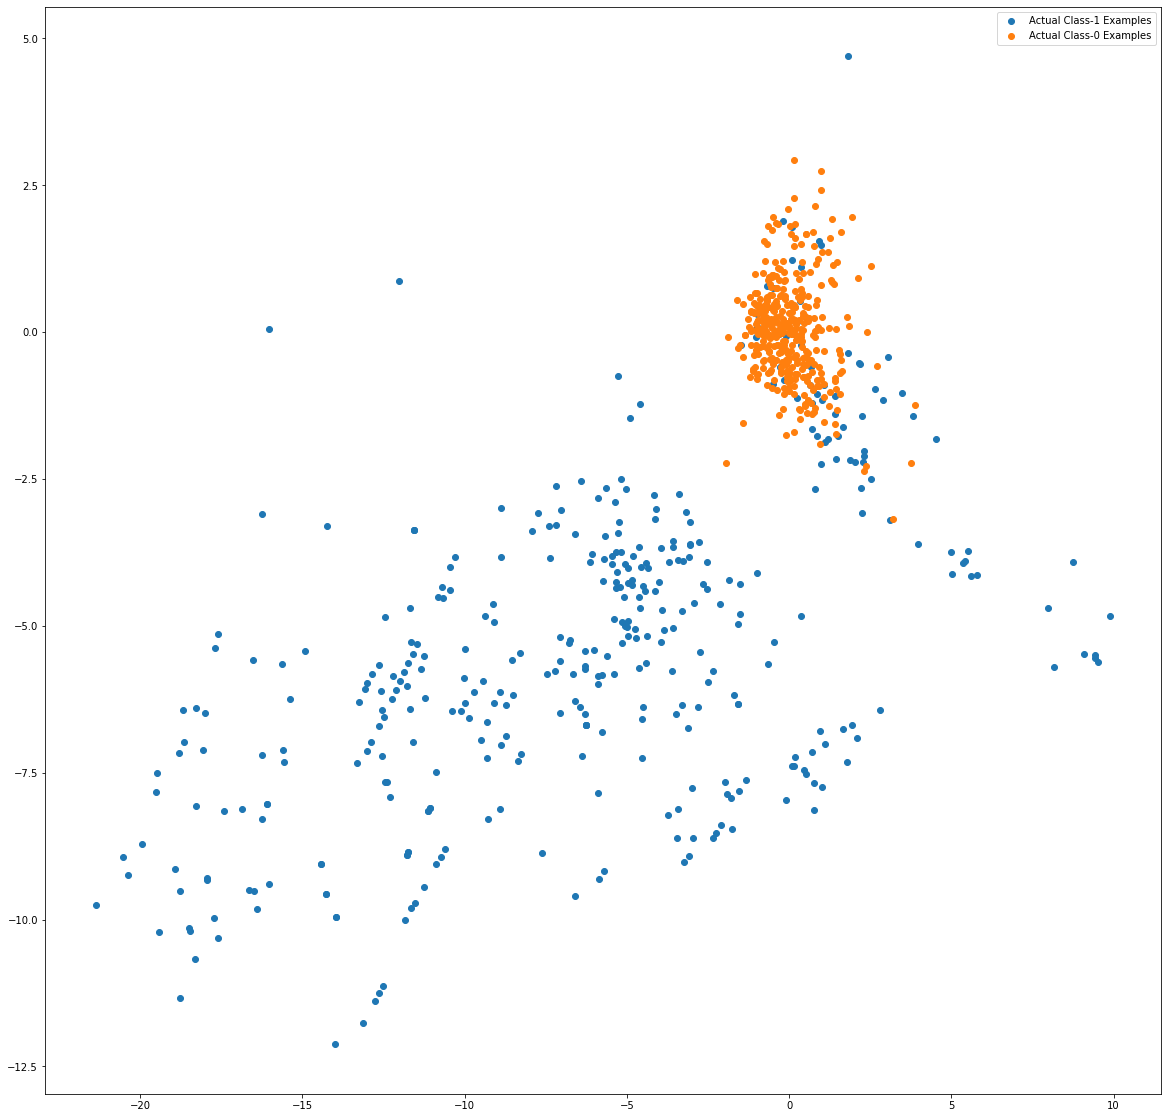

In [ ]:
# Features of XGBoost model

var_imp = []
for i in xgb_imbalanced_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imbalanced_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imbalanced_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imbalanced_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imbalanced_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imbalanced_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgboost))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgboost)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9972034697404676
Threshold= 0.0016353779


We can see that the threshold is 0.85, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

# Handling data imbalance
- Undersampling :- In this case, in order to balance the class distribution, the count  of non-fraudulent transactions will be minimized to 396 (similar count of fraudulent transactions).
- Oversampling :- in order to balance the class distribution, the count  of non-fraudulent transactions will be increased so that count of non- fraudulent becomes equal to the count of fraudulent transactions.
- SMOTE :- Synthetic minority oversampling technique. It is another oversampling technique, which works based oon nearest neighbor algorithm to create synthetic data. 
- Adasyn:- This is similar to SMOTE with minor changes that the new synthetic data is generated on the region of low density of imbalanced data points.


## Undersampling

In [ ]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
# instantiating the random undersampler 
rus = RandomUnderSampler()
# resampling X, y
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)

In [ ]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_us))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 394, 1: 394})


## Model building on balanced data with Undersampling

### Logistic Regression

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_us, y_train_us)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012177,0.002470,0.004712,0.000118,0.01,{'C': 0.01},0.988112,0.972530,0.964659,0.995116,0.967082,0.977500,0.012009,1,0.984245,0.986836,0.987904,0.982647,0.987114,0.985749,0.001979
1,0.013676,0.000579,0.004705,0.000143,0.1,{'C': 0.1},0.987952,0.973976,0.963534,0.994139,0.964461,0.976812,0.012339,2,0.987723,0.989013,0.989134,0.984958,0.989516,0.988069,0.001668
2,0.018969,0.004634,0.004735,0.000144,1,{'C': 1},0.979277,0.975422,0.962892,0.992022,0.962168,0.974356,0.011112,3,0.989265,0.990223,0.990051,0.986555,0.990632,0.989345,0.001464
3,0.020376,0.001790,0.004730,0.000083,10,{'C': 10},0.968514,0.976225,0.965141,0.990557,0.962987,0.972685,0.010003,4,0.990293,0.990938,0.990908,0.987450,0.991195,0.990157,0.001386
4,0.022371,0.003535,0.004711,0.000046,100,{'C': 100},0.964659,0.976386,0.964498,0.990557,0.960531,0.971326,0.010982,5,0.990334,0.991029,0.991140,0.987550,0.991406,0.990292,0.001416
5,0.022026,0.003469,0.004931,0.000514,1000,{'C': 1000},0.963534,0.976386,0.964659,0.990557,0.960531,0.971133,0.011108,6,0.990384,0.991039,0.991130,0.987580,0.991365,0.990300,0.001398


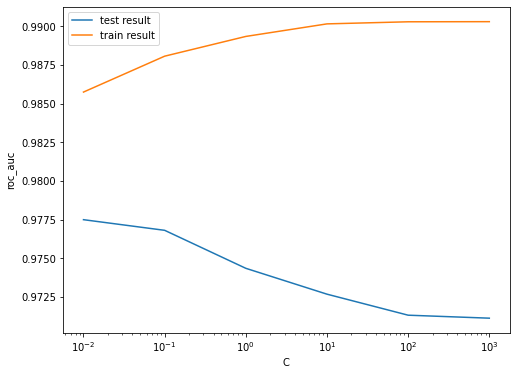

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9774996722933377 at C = 0.01


#### Logistic regression with optimal C

In [ ]:
# Instantiate the model with best C
logistic_bal_us = LogisticRegression(C=0.1)

In [ ]:
# Fit the model on the train set
logistic_bal_us_model = logistic_bal_us.fit(X_train_us, y_train_us)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_predicted = logistic_bal_us_model.predict(X_train_us)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train_us, y_train_predicted)
print(conf_mat)

[[390   4]
 [ 34 360]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
Accuracy_var=metrics.accuracy_score(y_train_us, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train_us, y_train_predicted)
print("F1-Score is:-", f1_score(y_train_us, y_train_predicted))

Accuracy:- 0.9517766497461929
Sensitivity:- 0.9137055837563451
Specificity:- 0.9898477157360406
F1-Score is:- 0.9498680738786279


In [ ]:
# classification_report
print(classification_report(y_train_us, y_train_predicted))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       394
           1       0.99      0.91      0.95       394

    accuracy                           0.95       788
   macro avg       0.95      0.95      0.95       788
weighted avg       0.95      0.95      0.95       788



In [ ]:
# Predicted probability
y_train_predicted_proba = logistic_bal_us_model.predict_proba(X_train_us)[:,1]

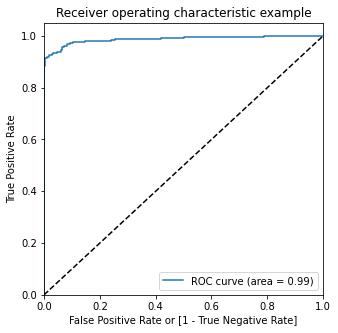

In [ ]:
# Plot the ROC curve
draw_roc(y_train_us, y_train_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_train_us, y_train_predicted_proba)
print("ROC-AUC found on the train set for balanced data",ROC_auc_var)

ROC-AUC found on the train set for balanced data 0.9872774356463706


In [ ]:
Train_scr_df_us['Logistic Regression']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

#### Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_predicted = logistic_bal_us_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_predicted)
print(conf_mat)

[[55269  1595]
 [    9    89]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.9718408763737229
Sensitivity:- 0.9081632653061225
Specificity:- 0.9719506190208216
F1-Score is:- 0.09988776655443322


In [ ]:
# classification_report
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.91      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [ ]:
# Predicted probability
y_test_predicted_proba = logistic_bal_us_model.predict_proba(X_test)[:,1]

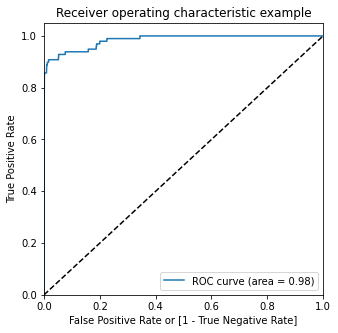

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set for balanced data",ROC_auc_var)

ROC-AUC found on the test set for balanced data 0.9840776561046478


In [ ]:
Test_scr_df_us['Logistic Regression']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

***Model summary & Comparative Study***


In [ ]:
print("Train Set \n",Train_scr_df_us)
print("\n\n")
print("Test Set \n",Test_scr_df_us)

Train Set 
        Metrics  Logistic Regression
0     Accuracy             0.951777
1  Sensitivity             0.913706
2  Specificity             0.989848
3     F1-Score             0.949868
4          ROC             0.987277



Test Set 
        Metrics  Logistic Regression
0     Accuracy             0.971841
1  Sensitivity             0.908163
2  Specificity             0.971951
3     F1-Score             0.099888
4          ROC             0.984078


### XGBoost

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_us, y_train_us)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.109477,0.009300,0.004158,0.000176,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.977446,0.973282,0.975351,0.975360,0.001700,3,1.0,0.999971,0.999667,0.999879,0.000150
1,0.130877,0.003965,0.004308,0.000069,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.977041,0.968136,0.982460,0.975879,0.005905,2,1.0,1.000000,1.000000,1.000000,0.000000
2,0.133721,0.004934,0.005153,0.000930,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.980453,0.968540,0.982402,0.977132,0.006127,1,1.0,1.000000,1.000000,1.000000,0.000000
3,0.089734,0.001603,0.003847,0.000105,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.977446,0.957206,0.985490,0.973381,0.011900,5,1.0,1.000000,0.999913,0.999971,0.000041
4,0.105370,0.005256,0.003719,0.000079,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.970854,0.966805,0.980479,0.972713,0.005735,6,1.0,1.000000,1.000000,1.000000,0.000000
5,0.107544,0.007237,0.004063,0.000329,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.975538,0.966574,0.981761,0.974624,0.006234,4,1.0,1.000000,1.000000,1.000000,0.000000


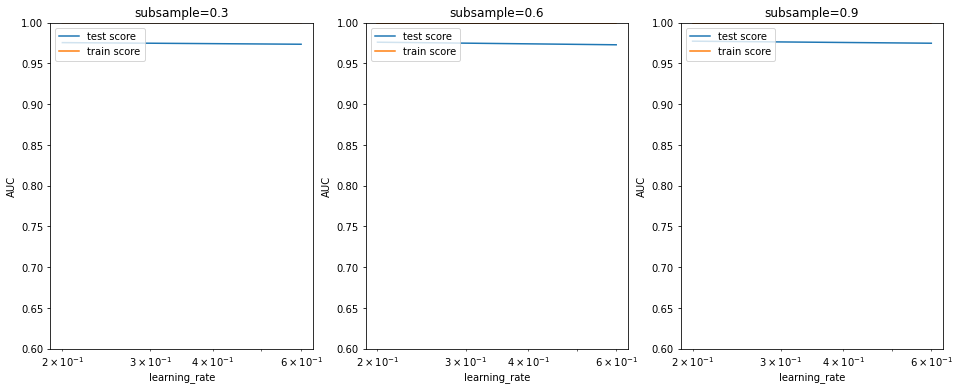

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [ ]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_us_model = XGBClassifier(params = params)
xgb_bal_us_model.fit(X_train_us, y_train_us)

XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6})

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_predicted = xgb_bal_us_model.predict(X_train_us)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train_us, y_train_predicted)
print(conf_mat)

[[394   0]
 [  2 392]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
Accuracy_var=metrics.accuracy_score(y_train_us, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train_us, y_train_predicted)
print("F1-Score is:-", f1_score(y_train_us, y_train_predicted))

Accuracy:- 0.9974619289340102
Sensitivity:- 0.9949238578680203
Specificity:- 1.0
F1-Score is:- 0.9974554707379135


In [ ]:
# classification_report
print(classification_report(y_train_us, y_train_predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       394
           1       1.00      0.99      1.00       394

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788



In [ ]:
# Predicted probability
y_train_pred_proba = xgb_bal_us_model.predict_proba(X_train_us)[:,1]

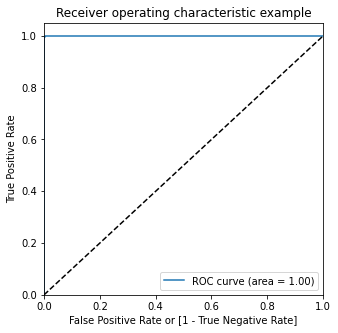

In [ ]:
# Plot the ROC curve
draw_roc(y_train_us, y_train_pred_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_train_us, y_train_predicted_proba)
print("ROC-AUC found on the train set for balanced data",ROC_auc_var)

ROC-AUC found on the train set for balanced data 0.9872774356463706


In [ ]:
Train_scr_df_us['XGBoost']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_predicted = xgb_bal_us_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_predicted)
print(conf_mat)

[[54855  2009]
 [    7    91]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.9646079842702152
Sensitivity:- 0.9285714285714286
Specificity:- 0.9646700900393922
F1-Score is:- 0.08280254777070063


In [ ]:
# classification_report
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [ ]:
# Predicted probability
y_test_predicted_proba = xgb_bal_us_model.predict_proba(X_test)[:,1]

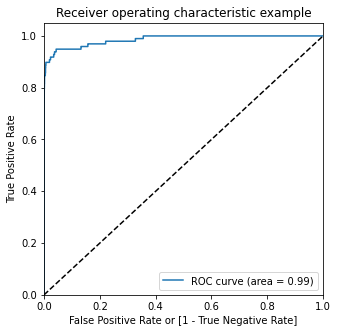

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set for balanced data",ROC_auc_var)

ROC-AUC found on the test set for balanced data 0.9857518081092876


In [ ]:
Test_scr_df_us['XGBoost']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

***Model summary & Comarative Study***


In [ ]:
print("Train Set \n",Train_scr_df_us)
print("\n\n")
print("Test Set \n",Test_scr_df_us)

Train Set 
        Metrics  Logistic Regression   XGBoost
0     Accuracy             0.951777  0.997462
1  Sensitivity             0.913706  0.994924
2  Specificity             0.989848  1.000000
3     F1-Score             0.949868  0.997455
4          ROC             0.987277  0.987277



Test Set 
        Metrics  Logistic Regression   XGBoost
0     Accuracy             0.971841  0.964608
1  Sensitivity             0.908163  0.928571
2  Specificity             0.971951  0.964670
3     F1-Score             0.099888  0.082803
4          ROC             0.984078  0.985752


### Decision Tree

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_us,y_train_us)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009506,0.004281,0.003622,0.000531,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.961659,0.952637,0.973224,0.962507,0.008426,4
1,0.007344,0.000748,0.003253,0.000099,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.960242,0.952059,0.973078,0.961793,0.008651,5
2,0.005287,0.000271,0.003135,0.000069,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.965649,0.953996,0.965008,0.961551,0.005348,6
3,0.007077,0.001232,0.005478,0.002167,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.965649,0.953996,0.968854,0.962833,0.006384,2
4,0.007970,0.002039,0.045763,0.059506,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.953794,0.950093,0.973224,0.959037,0.010145,8
5,0.006534,0.000361,0.003159,0.000050,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.957524,0.952290,0.969874,0.959896,0.007372,7
6,0.005567,0.000643,0.003096,0.000094,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.965649,0.953996,0.968941,0.962862,0.006412,1
7,0.005241,0.000289,0.003058,0.000028,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.965649,0.953996,0.968708,0.962784,0.006339,3


In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9628620421333549
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [ ]:
# Model with optimal hyperparameters
dt_bal_us_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_us_model.fit(X_train_us, y_train_us)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_predicted = dt_bal_us_model.predict(X_train_us)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train_us, y_train_predicted)
print(conf_mat)

[[390   4]
 [ 52 342]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
Accuracy_var=metrics.accuracy_score(y_train_us, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train_us, y_train_predicted)
print("F1-Score is:-", f1_score(y_train_us, y_train_predicted))

Accuracy:- 0.9289340101522843
Sensitivity:- 0.868020304568528
Specificity:- 0.9898477157360406
F1-Score is:- 0.9243243243243243


In [ ]:
# classification_report
print(classification_report(y_train_us, y_train_predicted))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       394
           1       0.99      0.87      0.92       394

    accuracy                           0.93       788
   macro avg       0.94      0.93      0.93       788
weighted avg       0.94      0.93      0.93       788



In [ ]:
# Predicted probability
y_train_pred_proba = dt_bal_us_model.predict_proba(X_train_us)[:,1]

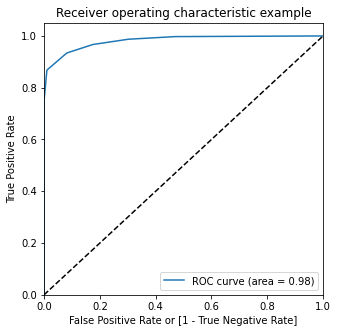

In [ ]:
# Plot the ROC curve
draw_roc(y_train_us, y_train_pred_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_train_us, y_train_predicted_proba)
print("ROC-AUC found on the train set for balanced data",ROC_auc_var)

ROC-AUC found on the train set for balanced data 0.9872774356463706


In [ ]:
Train_scr_df_us['Decision Tree']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_predicted = dt_bal_us_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_predicted)
print(conf_mat)

[[55358  1506]
 [   14    84]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.9733155436957972
Sensitivity:- 0.8571428571428571
Specificity:- 0.973515756893641
F1-Score is:- 0.0995260663507109


In [ ]:
# classification_report
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.86      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.92      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [ ]:
# Predicted probability
y_test_predicted_proba = dt_bal_us_model.predict_proba(X_test)[:,1]

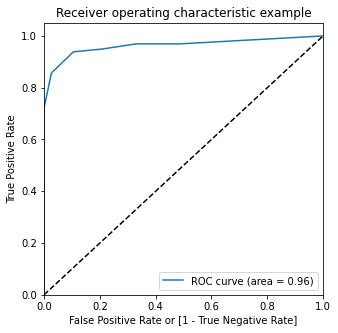

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set for balanced data",ROC_auc_var)

ROC-AUC found on the test set for balanced data 0.9628676333363959


In [ ]:
Test_scr_df_us['Decision Tree']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

***Model summary & Comarative Study***



In [ ]:
print("Train Set \n",Train_scr_df_us)
print("\n\n")
print("Test Set \n",Test_scr_df_us)

Train Set 
        Metrics  Logistic Regression   XGBoost  Decision Tree
0     Accuracy             0.951777  0.997462       0.928934
1  Sensitivity             0.913706  0.994924       0.868020
2  Specificity             0.989848  1.000000       0.989848
3     F1-Score             0.949868  0.997455       0.924324
4          ROC             0.987277  0.987277       0.987277



Test Set 
        Metrics  Logistic Regression   XGBoost  Decision Tree
0     Accuracy             0.971841  0.964608       0.973316
1  Sensitivity             0.908163  0.928571       0.857143
2  Specificity             0.971951  0.964670       0.973516
3     F1-Score             0.099888  0.082803       0.099526
4          ROC             0.984078  0.985752       0.962868


### Random forest

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_us, y_train_us)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc-auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get roc-auc of 0.9782009327733258 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


In [ ]:
# model with the best hyperparameters

rfc_bal_us_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=200)

In [ ]:
# Fit the model
rfc_bal_us_model.fit(X_train_us, y_train_us)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = rfc_bal_us_model.predict(X_train_us)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train_us, y_train_pred)
print(conf_mat)

[[393   1]
 [ 48 346]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
Accuracy_var=metrics.accuracy_score(y_train_us, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train_us, y_train_predicted)
print("F1-Score is:-", f1_score(y_train_us, y_train_predicted))

Accuracy:- 0.9289340101522843
Sensitivity:- 0.8781725888324873
Specificity:- 0.9974619289340102
F1-Score is:- 0.9243243243243243


In [ ]:
# classification_report
print(classification_report(y_train_us, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       394
           1       1.00      0.88      0.93       394

    accuracy                           0.94       788
   macro avg       0.94      0.94      0.94       788
weighted avg       0.94      0.94      0.94       788



In [ ]:
# Predicted probability
y_train_pred_proba = rfc_bal_us_model.predict_proba(X_train_us)[:,1]

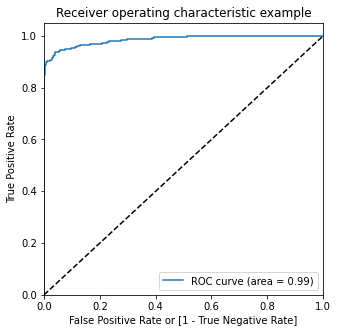

In [ ]:
# Plot the ROC curve
draw_roc(y_train_us, y_train_pred_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_train_us, y_train_predicted_proba)
print("ROC-AUC found on the train set for balanced data",ROC_auc_var)


ROC-AUC found on the train set for balanced data 0.9872774356463706


In [ ]:
Train_scr_df_us['Random Forest']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = rfc_bal_us_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_pred)
print(conf_mat)

[[55653  1211]
 [   10    88]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
Accuracy_var=metrics.accuracy_score(y_train_us, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train_us, y_train_predicted)
print("F1-Score is:-", f1_score(y_train_us, y_train_predicted))

Accuracy:- 0.9289340101522843
Sensitivity:- 0.8979591836734694
Specificity:- 0.9787035734383793
F1-Score is:- 0.9243243243243243


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.90      0.13        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
# Predicted probability
y_test_predicted_proba = rfc_bal_us_model.predict_proba(X_test)[:,1]

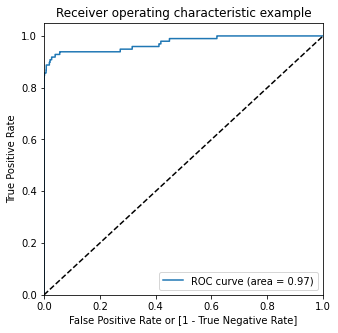

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set for balanced data",ROC_auc_var)

ROC-AUC found on the test set for balanced data 0.9725605598176243


In [ ]:
Test_scr_df_us['Random Forest']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

***Model summary & Comparative Study***

- 

In [ ]:
print("Train Set \n",Train_scr_df_us)
print("\n\n")
print("Test Set \n",Test_scr_df_us)

Train Set 
        Metrics  Logistic Regression   XGBoost  Decision Tree  Random Forest
0     Accuracy             0.951777  0.997462       0.928934       0.928934
1  Sensitivity             0.913706  0.994924       0.868020       0.878173
2  Specificity             0.989848  1.000000       0.989848       0.997462
3     F1-Score             0.949868  0.997455       0.924324       0.924324
4          ROC             0.987277  0.987277       0.987277       0.987277



Test Set 
        Metrics  Logistic Regression   XGBoost  Decision Tree  Random Forest
0     Accuracy             0.971841  0.964608       0.973316       0.928934
1  Sensitivity             0.908163  0.928571       0.857143       0.897959
2  Specificity             0.971951  0.964670       0.973516       0.978704
3     F1-Score             0.099888  0.082803       0.099526       0.924324
4          ROC             0.984078  0.985752       0.962868       0.972561


# Oversampling

In [ ]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
X_train_os, y_train_os = ros.fit_resample(X_train, y_train)

In [ ]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_os))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


### Logistic Regression

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_os, y_train_os)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.129482,0.322990,0.058316,0.002435,0.01,{'C': 0.01},0.986705,0.986598,0.987603,0.987086,0.987083,0.987015,0.000354,6,0.987111,0.987096,0.986873,0.987003,0.987082,0.987033,0.000088
1,3.066964,0.157643,0.055926,0.000592,0.1,{'C': 0.1},0.986866,0.986762,0.987761,0.987235,0.987225,0.987170,0.000351,5,0.987269,0.987251,0.987028,0.987157,0.987237,0.987188,0.000089
2,2.904489,0.143549,0.055395,0.000713,1,{'C': 1},0.986882,0.986780,0.987778,0.987252,0.987241,0.987187,0.000351,4,0.987286,0.987268,0.987045,0.987174,0.987255,0.987206,0.000089
3,2.927471,0.185329,0.059346,0.005957,10,{'C': 10},0.986885,0.986782,0.987779,0.987253,0.987243,0.987189,0.000350,3,0.987288,0.987270,0.987047,0.987176,0.987258,0.987208,0.000089
4,2.950618,0.166451,0.056943,0.003504,100,{'C': 100},0.986885,0.986782,0.987780,0.987254,0.987243,0.987189,0.000350,2,0.987288,0.987270,0.987047,0.987176,0.987258,0.987208,0.000089
5,2.902022,0.158068,0.057428,0.002504,1000,{'C': 1000},0.986885,0.986782,0.987779,0.987254,0.987243,0.987189,0.000350,1,0.987288,0.987270,0.987047,0.987176,0.987258,0.987208,0.000089


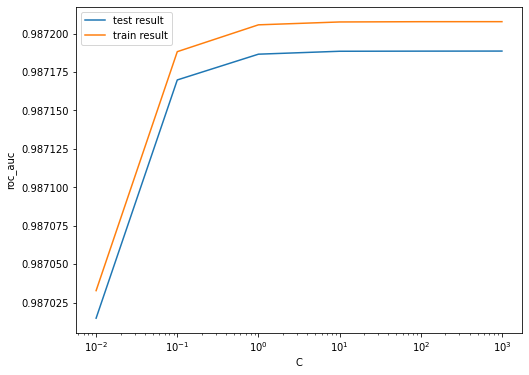

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.987188666022411 at C = 1000


#### Logistic regression with optimal C

In [ ]:
# Instantiate the model with best C
logistic_bal_os = LogisticRegression(C=0.1)

In [ ]:
# Fit the model on the train set
logistic_bal_os_model = logistic_bal_os.fit(X_train_os, y_train_os)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_predicted = logistic_bal_os_model.predict(X_train_os)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train_os, y_train_predicted)
print(conf_mat)

[[221417   6034]
 [ 18335 209116]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_train_os, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train_os, y_train_predicted)
print("F1-Score is:-", f1_score(y_train_os, y_train_predicted))

Accuracy:- 0.9464302201353259
Sensitivity:- 0.9193892310871352
Specificity:- 0.9734712091835165
F1-Score is:- 0.9449413806114311


In [ ]:
# classification_report
print(classification_report(y_train_os, y_train_predicted))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



In [ ]:
# Predicted probability
y_train_predicted_proba = logistic_bal_os_model.predict_proba(X_train_os)[:,1]

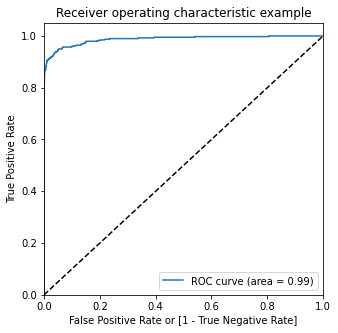

In [ ]:
# Plot the ROC curve
draw_roc(y_train_os, y_train_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_train_os, y_train_predicted_proba)
print("ROC-AUC found on the train set for balanced data",ROC_auc_var)

ROC-AUC found on the train set for balanced data 0.9871852843218372


In [ ]:
Train_scr_df_os['Logistic Regression']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

#### Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_predicted = logistic_bal_os_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_predicted)
print(conf_mat)

[[55319  1545]
 [    8    90]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.9727362101049822
Sensitivity:- 0.9183673469387755
Specificity:- 0.9728299099606078
F1-Score is:- 0.103866128101558


In [ ]:
# classification_report
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



In [ ]:
# Predicted probability
y_test_predicted_proba = logistic_bal_os_model.predict_proba(X_test)[:,1]

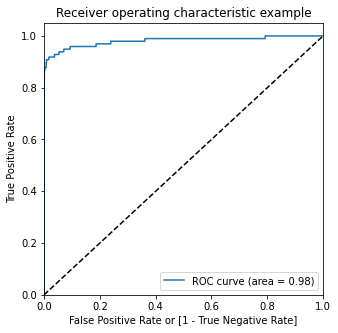

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:


ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set for balanced data",ROC_auc_var)


ROC-AUC found on the test set for balanced data 0.9806843108655956


In [ ]:
Test_scr_df_os['Logistic Regression']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

***Model summary & comarative study on balanced dataset***


In [ ]:
print("Train Set \n",Train_scr_df_os)
print("\n\n")
print("Test Set \n",Test_scr_df_os)

Train Set 
        Metrics  Logistic Regression
0     Accuracy             0.946430
1  Sensitivity             0.919389
2  Specificity             0.973471
3     F1-Score             0.944941
4          ROC             0.987185



Test Set 
        Metrics  Logistic Regression
0     Accuracy             0.972736
1  Sensitivity             0.918367
2  Specificity             0.972830
3     F1-Score             0.103866
4          ROC             0.980684


### XGBoost

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_os, y_train_os)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,75.791845,0.675491,0.829986,0.012880,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999887,0.999900,0.999889,0.999892,0.000006,4,0.999888,0.999904,0.999910,0.999901,0.000009
1,87.264542,0.419184,0.817608,0.001613,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999886,0.999898,0.999885,0.999890,0.000006,6,0.999895,0.999915,0.999906,0.999906,0.000008
2,87.390471,1.121012,0.816102,0.004183,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999897,0.999896,0.999876,0.999890,0.000010,5,0.999905,0.999898,0.999914,0.999906,0.000006
3,74.046365,2.723354,0.849785,0.003983,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999973,0.999983,0.999986,0.999981,0.000006,2,0.999999,0.999992,0.999997,0.999996,0.000003
4,85.287776,1.353489,0.852595,0.011083,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999987,0.999968,0.999970,0.999975,0.000008,3,1.000000,0.999997,0.999994,0.999997,0.000002
5,79.714339,0.139831,0.833244,0.005935,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999984,0.999972,0.999997,0.999984,0.000011,1,0.999996,0.999995,1.000000,0.999997,0.000002


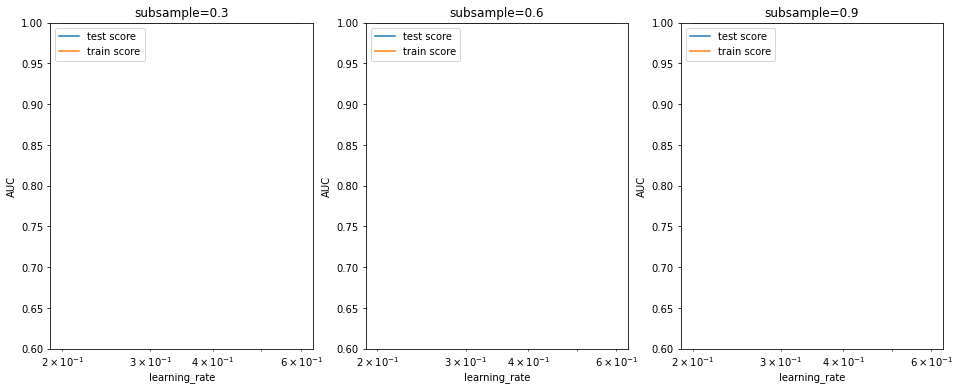

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [ ]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_os_model = XGBClassifier(params = params)
xgb_bal_os_model.fit(X_train_os, y_train_os)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_predicted = xgb_bal_os_model.predict(X_train_os)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train_os, y_train_predicted)
print(conf_mat)

[[226227   1224]
 [     0 227451]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_train_os, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train_os, y_train_predicted)
print("F1-Score is:-", f1_score(y_train_os, y_train_predicted))

Accuracy:- 0.9973093105767836
Sensitivity:- 1.0
Specificity:- 0.9946186211535671
F1-Score is:- 0.9973165309585509


In [ ]:
# classification_report
print(classification_report(y_train_os, y_train_predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.99      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



In [ ]:
# Predicted probability
y_train_predicted_proba = xgb_bal_os_model.predict_proba(X_train_os)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_os, y_train_predicted_proba)
auc

0.9997318766203698

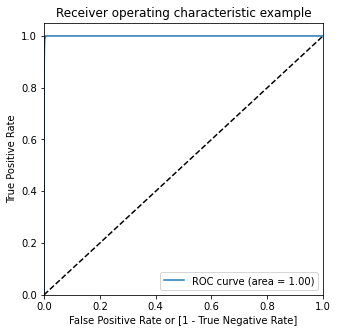

In [ ]:
# Plot the ROC curve
draw_roc(y_train_os, y_train_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_train_os, y_train_predicted_proba)
print("ROC-AUC found on the train set for balanced data",ROC_auc_var)


ROC-AUC found on the train set for balanced data 0.9997318766203698


In [ ]:

Train_scr_df_os['XGBoost']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]


##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_predicted = xgb_bal_os_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_predicted)
print(conf_mat)

[[56566   298]
 [    9    89]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.9946104420490853
Sensitivity:- 0.9081632653061225
Specificity:- 0.9947594259988745
F1-Score is:- 0.3670103092783505


In [ ]:
# classification_report
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.23      0.91      0.37        98

    accuracy                           0.99     56962
   macro avg       0.61      0.95      0.68     56962
weighted avg       1.00      0.99      1.00     56962



In [ ]:
# Predicted probability
y_test_predicted_proba = xgb_bal_os_model.predict_proba(X_test)[:,1]

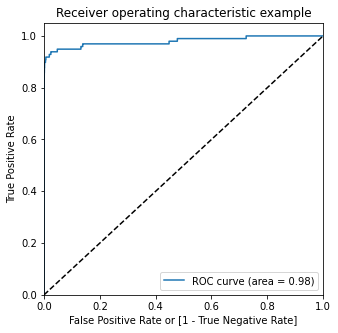

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:

ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set for balanced data",ROC_auc_var)


ROC-AUC found on the test set for balanced data 0.9792105115822356


In [ ]:
Test_scr_df_os['XGBoost']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

***Model summary & Comparative Study***



In [ ]:
print("Train Set \n",Train_scr_df_os)
print("\n\n")
print("Test Set \n",Test_scr_df_os)

Train Set 
        Metrics  Logistic Regression   XGBoost
0     Accuracy             0.946430  0.997309
1  Sensitivity             0.919389  1.000000
2  Specificity             0.973471  0.994619
3     F1-Score             0.944941  0.997317
4          ROC             0.987185  0.999732



Test Set 
        Metrics  Logistic Regression   XGBoost
0     Accuracy             0.972736  0.994610
1  Sensitivity             0.918367  0.908163
2  Specificity             0.972830  0.994759
3     F1-Score             0.103866  0.367010
4          ROC             0.980684  0.979211


### Decision Tree

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_os,y_train_os)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.972794,0.018211,0.059990,0.000558,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.987419,0.987013,0.986803,0.987079,0.000256,6
1,4.953097,0.012205,0.060342,0.001045,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.987415,0.987027,0.986801,0.987081,0.000254,5
2,4.958614,0.009623,0.063526,0.004402,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.987312,0.986980,0.986702,0.986998,0.000249,7
3,4.957399,0.006133,0.060199,0.000344,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.987294,0.986967,0.986702,0.986988,0.000242,8
4,8.885694,0.036864,0.062770,0.000491,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999372,0.999452,0.998534,0.999119,0.000415,3
5,8.849553,0.028463,0.063142,0.000743,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999359,0.999477,0.998516,0.999117,0.000428,4
6,8.820281,0.013426,0.062788,0.000717,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999355,0.999527,0.998578,0.999153,0.000413,1
7,8.847625,0.006124,0.062833,0.000648,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999333,0.999479,0.998582,0.999131,0.000393,2


In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.999153400103137
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [ ]:
# Model with optimal hyperparameters
dt_bal_os_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_os_model.fit(X_train_os, y_train_os)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_predicted = dt_bal_os_model.predict(X_train_os)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train_os, y_train_predicted)
print(conf_mat)

[[226040   1411]
 [  1138 226313]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_train_os, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train_os, y_train_predicted)
print("F1-Score is:-", f1_score(y_train_os, y_train_predicted))

Accuracy:- 0.9943965953106383
Sensitivity:- 0.9949967245692479
Specificity:- 0.9937964660520288
F1-Score is:- 0.9943999560608558


In [ ]:
# classification_report
print(classification_report(y_train_os, y_train_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



In [ ]:
# Predicted probability
y_train_predicted_proba = dt_bal_os_model.predict_proba(X_train_os)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_os, y_train_predicted_proba)
auc

0.9994878605304707

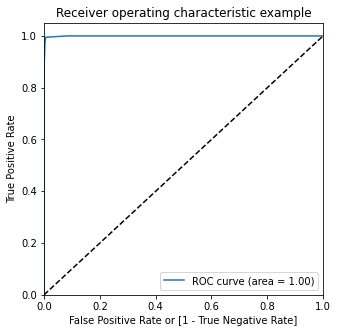

In [ ]:
# Plot the ROC curve
draw_roc(y_train_os, y_train_predicted_proba)

In [ ]:

ROC_auc_var = metrics.roc_auc_score(y_train_os, y_train_predicted_proba)
print("ROC-AUC found on the train set for balanced data",ROC_auc_var)


ROC-AUC found on the train set for balanced data 0.9994878605304707


In [ ]:

Train_scr_df_os['Decision Tree']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_predicted = dt_bal_os_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_predicted)
print(conf_mat)

[[56500   364]
 [   18    80]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.9932937747972332
Sensitivity:- 0.8163265306122449
Specificity:- 0.9935987619583568
F1-Score is:- 0.2952029520295203


In [ ]:
# classification_report
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.18      0.82      0.30        98

    accuracy                           0.99     56962
   macro avg       0.59      0.90      0.65     56962
weighted avg       1.00      0.99      1.00     56962



In [ ]:
# Predicted probability
y_test_predicted_proba = dt_bal_os_model.predict_proba(X_test)[:,1]

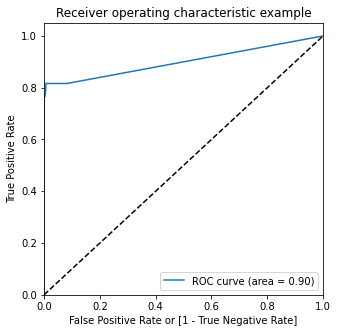

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:

ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set for balanced data",ROC_auc_var)


ROC-AUC found on the test set for balanced data 0.9002648998541454


In [ ]:

Test_scr_df_os['Decision Tree']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

***Model summary & Comparative Study***



In [ ]:
print("Train Set \n",Train_scr_df_os)
print("\n\n")
print("Test Set \n",Test_scr_df_os)

Train Set 
        Metrics  Logistic Regression   XGBoost  Decision Tree
0     Accuracy             0.946430  0.997309       0.994397
1  Sensitivity             0.919389  1.000000       0.994997
2  Specificity             0.973471  0.994619       0.993796
3     F1-Score             0.944941  0.997317       0.994400
4          ROC             0.987185  0.999732       0.999488



Test Set 
        Metrics  Logistic Regression   XGBoost  Decision Tree
0     Accuracy             0.972736  0.994610       0.993294
1  Sensitivity             0.918367  0.908163       0.816327
2  Specificity             0.972830  0.994759       0.993599
3     F1-Score             0.103866  0.367010       0.295203
4          ROC             0.980684  0.979211       0.900265


## SMOTE (Synthetic Minority Oversampling Technique)

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [ ]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [ ]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_sm.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454902, 29)


### Logistic Regression

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.918524,0.024477,0.058608,0.000397,0.01,{'C': 0.01},0.989497,0.989495,0.989884,0.989501,0.989864,0.989648,0.000185,6,0.989711,0.989660,0.989567,0.989688,0.989677,0.989661,0.000050
1,2.976114,0.079665,0.058321,0.000284,0.1,{'C': 0.1},0.989621,0.989609,0.989995,0.989605,0.989983,0.989762,0.000185,5,0.989823,0.989778,0.989676,0.989800,0.989794,0.989774,0.000051
2,2.991779,0.102541,0.058537,0.000900,1,{'C': 1},0.989634,0.989620,0.990005,0.989615,0.989995,0.989774,0.000185,4,0.989834,0.989790,0.989687,0.989811,0.989806,0.989786,0.000051
3,2.943152,0.085183,0.058464,0.000343,10,{'C': 10},0.989635,0.989622,0.990006,0.989616,0.989996,0.989775,0.000185,3,0.989835,0.989791,0.989688,0.989812,0.989807,0.989787,0.000051
4,2.960538,0.074959,0.058866,0.000802,100,{'C': 100},0.989635,0.989622,0.990006,0.989616,0.989996,0.989775,0.000185,2,0.989835,0.989791,0.989688,0.989812,0.989808,0.989787,0.000051
5,2.965827,0.099320,0.061365,0.005885,1000,{'C': 1000},0.989635,0.989622,0.990006,0.989616,0.989996,0.989775,0.000185,1,0.989835,0.989791,0.989688,0.989812,0.989808,0.989787,0.000051


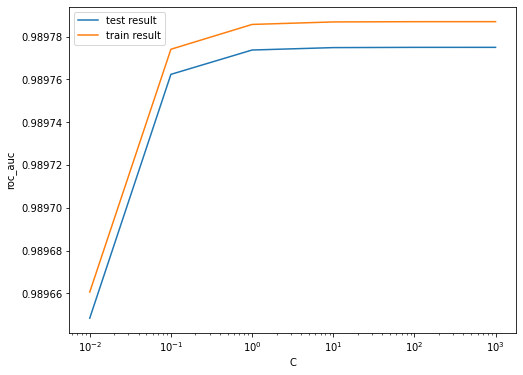

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9897749804896302 at C = 1000


#### Logistic regression with optimal C

In [ ]:
# Instantiate the model with best C
logistic_bal_sm = LogisticRegression(C=0.1)

In [ ]:
# Fit the model on the train set
logistic_bal_sm_model = logistic_bal_sm.fit(X_train_sm, y_train_sm)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_predicted = logistic_bal_sm_model.predict(X_train_sm)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train_sm, y_train_predicted)
print(conf_mat)

[[220950   6501]
 [ 18775 208676]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_train_sm, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train_sm, y_train_predicted)
print("F1-Score is:-", f1_score(y_train_sm, y_train_predicted))

Accuracy:- 0.9444363841003117
Sensitivity:- 0.9174547484952803
Specificity:- 0.9714180197053431
F1-Score is:- 0.9428956143759546


In [ ]:
# classification_report
print(classification_report(y_train_sm, y_train_predicted))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



In [ ]:
# Predicted probability
y_train_predicted_proba_log_bal_sm = logistic_bal_sm_model.predict_proba(X_train_sm)[:,1]

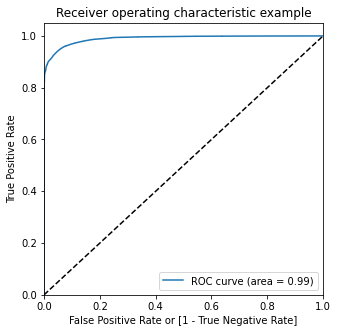

In [ ]:
# Plot the ROC curve
draw_roc(y_train_sm, y_train_predicted_proba_log_bal_sm)

In [ ]:

ROC_auc_var = metrics.roc_auc_score(y_train_sm, y_train_predicted_proba)
print("ROC-AUC found on the test set for balanced data",ROC_auc_var)


ROC-AUC found on the test set for balanced data 0.9994878605304707


In [ ]:
Train_scr_df_sm['Logistic Regrassion']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

#### Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_predicted = logistic_bal_sm_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_predicted)
print(conf_mat)

[[55168  1696]
 [    7    91]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.9701028756012781
Sensitivity:- 0.9285714285714286
Specificity:- 0.9701744513224536
F1-Score is:- 0.09655172413793103


In [ ]:
# classification_report
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.93      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



##### ROC on the test set

In [ ]:
# Predicted probability
y_test_predicted_proba = logistic_bal_sm_model.predict_proba(X_test)[:,1]

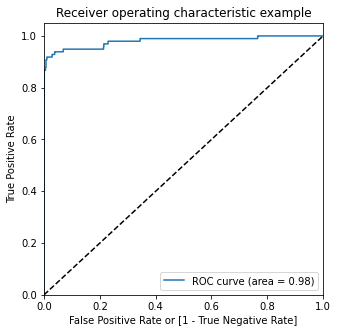

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set for balanced data",ROC_auc_var)


ROC-AUC found on the test set for balanced data 0.9800828040839296


In [ ]:
Test_scr_df_sm['Logistic Regression']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

***Model summary & Comarative Study***


In [ ]:
print("Train Set \n",Train_scr_df_sm)
print("\n\n")
print("Test Set \n",Test_scr_df_sm)

Train Set 
        Metrics  Logistic Regrassion
0     Accuracy             0.944436
1  Sensitivity             0.917455
2  Specificity             0.971418
3     F1-Score             0.942896
4          ROC             0.999488



Test Set 
        Metrics  Logistic Regression
0     Accuracy             0.970103
1  Sensitivity             0.928571
2  Specificity             0.970174
3     F1-Score             0.096552
4          ROC             0.980083


### XGBoost

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_sm, y_train_sm)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,79.191590,0.795815,0.846394,0.017975,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999499,0.999597,0.999569,0.999555,0.000041,5,0.999568,0.999607,0.999610,0.999595,0.000019
1,98.976627,0.205711,0.823619,0.002909,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999544,0.999575,0.999556,0.999558,0.000013,4,0.999616,0.999582,0.999594,0.999597,0.000014
2,103.712851,0.275807,0.825758,0.005116,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999480,0.999573,0.999541,0.999532,0.000038,6,0.999571,0.999587,0.999587,0.999582,0.000007
3,79.458927,0.521722,0.844515,0.017365,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999940,0.999930,0.999925,0.999932,0.000006,3,0.999966,0.999955,0.999958,0.999960,0.000005
4,100.639919,0.396793,0.850188,0.003890,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999952,0.999953,0.999938,0.999947,0.000007,1,0.999973,0.999972,0.999970,0.999972,0.000001
5,104.978486,0.258930,0.843843,0.007202,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999940,0.999949,0.999945,0.999945,0.000004,2,0.999975,0.999979,0.999971,0.999975,0.000003


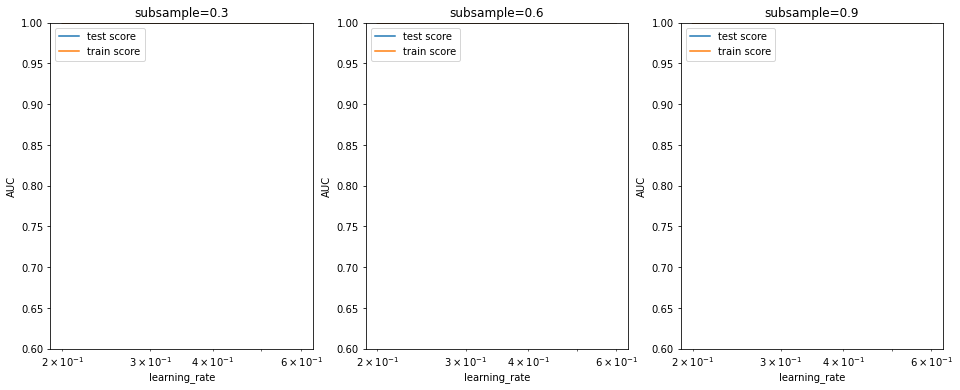

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_sm_model = XGBClassifier(params = params)
xgb_bal_sm_model.fit(X_train_sm, y_train_sm)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_predicted = xgb_bal_sm_model.predict(X_train_sm)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train_sm, y_train_predicted)
print(conf_mat)

[[225014   2437]
 [  6668 220783]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_train_sm, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train_sm, y_train_predicted)
print("F1-Score is:-", f1_score(y_train_sm, y_train_predicted))

Accuracy:- 0.979984700001319
Sensitivity:- 0.9706837956307073
Specificity:- 0.9892856043719307
F1-Score is:- 0.9797967918947524


In [ ]:
# classification_report
print(classification_report(y_train_sm, y_train_predicted))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    227451
           1       0.99      0.97      0.98    227451

    accuracy                           0.98    454902
   macro avg       0.98      0.98      0.98    454902
weighted avg       0.98      0.98      0.98    454902



In [ ]:
# Predicted probability
y_train_predicted_proba = xgb_bal_sm_model.predict_proba(X_train_sm)[:,1]

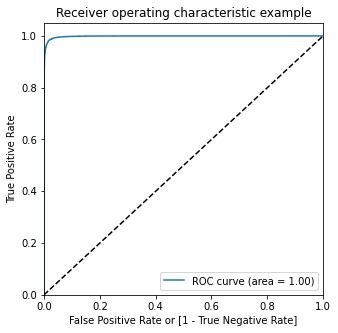

In [ ]:
# Plot the ROC curve
draw_roc(y_train_sm, y_train_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_train_sm, y_train_predicted_proba)
print("ROC-AUC found on the test set for balanced data",ROC_auc_var)


ROC-AUC found on the test set for balanced data 0.9985844512061514


In [ ]:
Train_scr_df_sm['XGBoost']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]


##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_predicted = xgb_bal_sm_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_predicted)
print(conf_mat)

[[56261   603]
 [    9    89]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.9892559952248867
Sensitivity:- 0.9081632653061225
Specificity:- 0.989395751266179
F1-Score is:- 0.22531645569620254


In [ ]:
# classification_report
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.91      0.23        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.61     56962
weighted avg       1.00      0.99      0.99     56962



In [ ]:
# Predicted probability
y_test_predicted_proba = xgb_bal_sm_model.predict_proba(X_test)[:,1]

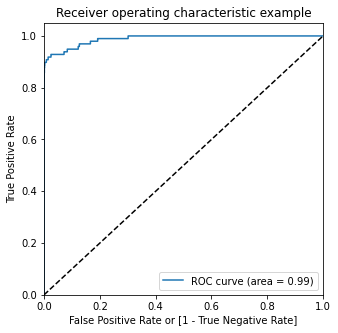

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set for balanced data",ROC_auc_var)

ROC-AUC found on the test set for balanced data 0.988502642897339


In [ ]:
Test_scr_df_sm['XGBoost']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]


***Model summary & Comarative Study***

Overall, the model is performing well in the test set, what it had learnt from the train set.

In [ ]:
print("Train Set \n",Train_scr_df_sm)
print("\n\n")
print("Test Set \n",Test_scr_df_sm)

Train Set 
        Metrics  Logistic Regrassion   XGBoost
0     Accuracy             0.944436  0.979985
1  Sensitivity             0.917455  0.970684
2  Specificity             0.971418  0.989286
3     F1-Score             0.942896  0.979797
4          ROC             0.999488  0.998584



Test Set 
        Metrics  Logistic Regression   XGBoost
0     Accuracy             0.970103  0.989256
1  Sensitivity             0.928571  0.908163
2  Specificity             0.970174  0.989396
3     F1-Score             0.096552  0.225316
4          ROC             0.980083  0.988503


### Decision Tree

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,8.559307,0.046650,0.062268,0.000341,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.987397,0.987501,0.987930,0.987610,0.000231,6
1,8.516627,0.027244,0.063127,0.000678,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.987397,0.987503,0.987930,0.987610,0.000231,5
2,8.499572,0.010895,0.063610,0.002552,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.987350,0.987457,0.987914,0.987573,0.000244,7
3,8.411487,0.061281,0.062091,0.000873,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.987350,0.987452,0.987904,0.987569,0.000241,8
4,15.808265,0.081283,0.070743,0.004298,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997810,0.997739,0.997037,0.997529,0.000349,2
5,15.666420,0.028875,0.067228,0.000563,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997922,0.997696,0.997009,0.997542,0.000388,1
6,15.659523,0.083604,0.066843,0.000058,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997653,0.997535,0.997164,0.997451,0.000208,3
7,15.673954,0.045660,0.066947,0.000166,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997638,0.997529,0.997131,0.997433,0.000218,4


In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9975420811998902
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [ ]:
# Model with optimal hyperparameters
dt_bal_sm_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_sm_model.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_predicted = dt_bal_sm_model.predict(X_train_sm)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train_sm, y_train_predicted)
print(conf_mat)

[[224618   2833]
 [  2661 224790]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_train_sm, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train_sm, y_train_predicted)
print("F1-Score is:-", f1_score(y_train_sm, y_train_predicted))

Accuracy:- 0.9879226734549419
Sensitivity:- 0.9883007768706227
Specificity:- 0.9875445700392612
F1-Score is:- 0.9879272382074124


In [ ]:
# classification_report
print(classification_report(y_train_sm, y_train_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



In [ ]:
# Predicted probability
y_train_predicted_proba = dt_bal_sm_model.predict_proba(X_train_sm)[:,1]

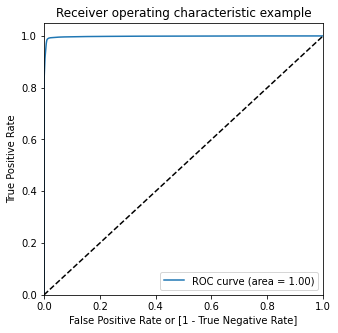

In [ ]:
# Plot the ROC curve
draw_roc(y_train_sm, y_train_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_train_sm, y_train_predicted_proba)
print("ROC-AUC found on the test set for balanced data",ROC_auc_var)

ROC-AUC found on the test set for balanced data 0.9980211814706828


In [ ]:
Train_scr_df_sm['Decision Tree']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]


##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_predicted = dt_bal_sm_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_pred)
print(conf_mat)

[[55653  1211]
 [   10    88]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.9862013272005898
Sensitivity:- 0.8979591836734694
Specificity:- 0.9787035734383793
F1-Score is:- 0.17782426778242677


In [ ]:
# classification_report
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.87      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.93      0.59     56962
weighted avg       1.00      0.99      0.99     56962



In [ ]:
# Predicted probability
y_test_predicted_proba = dt_bal_sm_model.predict_proba(X_test)[:,1]

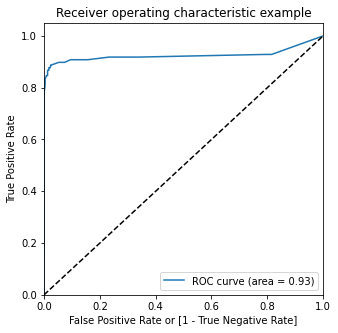

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set for balanced data",ROC_auc_var)


ROC-AUC found on the test set for balanced data 0.9250452027321903


In [ ]:
Test_scr_df_sm['Decision Tree']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]


***Model summary & Comparative Study***


In [ ]:
print("Train Set \n",Train_scr_df_sm)
print("\n\n")
print("Test Set \n",Test_scr_df_sm)

Train Set 
        Metrics  Logistic Regrassion   XGBoost  Decision Tree
0     Accuracy             0.944436  0.979985       0.987923
1  Sensitivity             0.917455  0.970684       0.988301
2  Specificity             0.971418  0.989286       0.987545
3     F1-Score             0.942896  0.979797       0.987927
4          ROC             0.999488  0.998584       0.998021



Test Set 
        Metrics  Logistic Regression   XGBoost  Decision Tree
0     Accuracy             0.970103  0.989256       0.986201
1  Sensitivity             0.928571  0.908163       0.897959
2  Specificity             0.970174  0.989396       0.978704
3     F1-Score             0.096552  0.225316       0.177824
4          ROC             0.980083  0.988503       0.925045


## AdaSyn (Adaptive Synthetic Sampling)

In [ ]:
## AdaSyn (Adaptive Synthetic Sampling)

In [ ]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

In [ ]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_ad, y_train_ad = ada.fit_resample(X_train, y_train)

In [ ]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_ad))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227394})


### Logistic Regression

In [ ]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_ad, y_train_ad)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.190108,0.202452,0.097502,0.000244,0.01,{'C': 0.01},0.964750,0.964980,0.964933,0.964888,0.000099,6,0.965008,0.964674,0.965068,0.964917,0.000174
1,2.185679,0.167147,0.099485,0.001531,0.1,{'C': 0.1},0.965032,0.965201,0.965165,0.965133,0.000073,5,0.965258,0.964920,0.965311,0.965163,0.000173
2,2.234805,0.189561,0.103773,0.008199,1,{'C': 1},0.965056,0.965218,0.965182,0.965152,0.000070,4,0.965278,0.964939,0.965330,0.965182,0.000173
3,2.316501,0.264270,0.102682,0.004054,10,{'C': 10},0.965058,0.965220,0.965183,0.965154,0.000069,3,0.965280,0.964941,0.965331,0.965184,0.000173
4,2.241644,0.187273,0.104768,0.007779,100,{'C': 100},0.965058,0.965220,0.965184,0.965154,0.000069,2,0.965281,0.964941,0.965331,0.965184,0.000173
5,2.212760,0.185475,0.104221,0.004062,1000,{'C': 1000},0.965058,0.965220,0.965184,0.965154,0.000069,1,0.965281,0.964941,0.965331,0.965184,0.000173


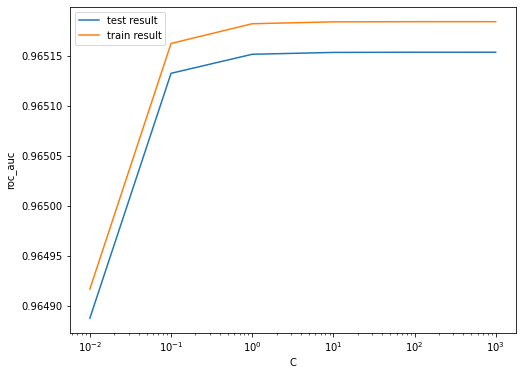

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9651539029432152 at C = 1000


#### Logistic regression with optimal C

In [ ]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

In [ ]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_ad, y_train_ad)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_predicted = logistic_bal_adasyn_model.predict(X_train_ad)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train_ad, y_train_predicted)
print(conf_mat)

[[206699  20752]
 [ 26652 200742]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_train_ad, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train_ad, y_train_predicted)
print("F1-Score is:-", f1_score(y_train_ad, y_train_predicted))

Accuracy:- 0.8957798810583826
Sensitivity:- 0.8827937412596638
Specificity:- 0.9087627664859684
F1-Score is:- 0.8943968205877636


In [ ]:
# classification_report
print(classification_report(y_train_ad, y_train_predicted))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90    227451
           1       0.91      0.88      0.89    227394

    accuracy                           0.90    454845
   macro avg       0.90      0.90      0.90    454845
weighted avg       0.90      0.90      0.90    454845



In [ ]:
# Predicted probability
y_train_predicted_proba = logistic_bal_adasyn_model.predict_proba(X_train_ad)[:,1]

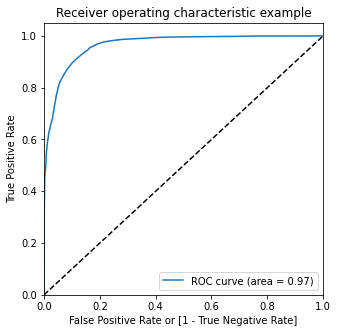

In [ ]:
# Plot the ROC curve
draw_roc(y_train_ad, y_train_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_train_ad, y_train_predicted_proba)
print("ROC-AUC found on the test set for balanced data",ROC_auc_var)

ROC-AUC found on the test set for balanced data 0.9651820115256815


In [ ]:
Train_scr_df_Adasyn['Logistic Regression']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]


#### Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_pred)
print(conf_mat)

[[51600  5264]
 [    5    93]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.9862013272005898
Sensitivity:- 0.9489795918367347
Specificity:- 0.9074282498593135
F1-Score is:- 0.17782426778242677


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [ ]:
# Predicted probability
y_test_predicted_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

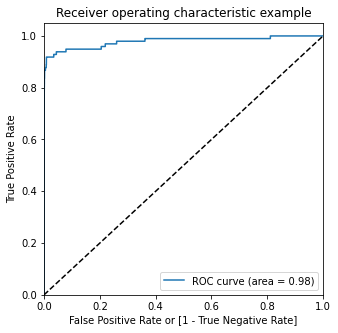

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set for balanced data",ROC_auc_var)

ROC-AUC found on the test set for balanced data 0.9788714462290264


In [ ]:
Test_scr_df_Adasyn['Logistic Regression']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

***Model summary & Comparative Study***


In [ ]:
print("Train Set \n",Train_scr_df_Adasyn)
print("\n\n")
print("Test Set \n",Test_scr_df_Adasyn)

Train Set 
        Metrics  Logistic Regression
0     Accuracy             0.895780
1  Sensitivity             0.882794
2  Specificity             0.908763
3     F1-Score             0.894397
4          ROC             0.965182



Test Set 
        Metrics  Logistic Regression
0     Accuracy             0.986201
1  Sensitivity             0.948980
2  Specificity             0.907428
3     F1-Score             0.177824
4          ROC             0.978871


### Decision Tree

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ad,y_train_ad)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,8.502190,0.060015,0.061227,0.000203,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.916149,0.896101,0.933821,0.915357,0.015409,6
1,8.437227,0.043901,0.062332,0.000861,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.916149,0.896101,0.933824,0.915358,0.015410,5
2,8.403928,0.026764,0.061231,0.000493,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.916149,0.903618,0.933762,0.917843,0.012364,4
3,8.462849,0.048898,0.061065,0.000699,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.916149,0.903618,0.933769,0.917845,0.012367,3
4,15.324256,0.187210,0.072425,0.008978,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.875915,0.894771,0.946258,0.905648,0.029730,8
5,15.226244,0.046957,0.067092,0.001997,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.880083,0.897668,0.947092,0.908281,0.028367,7
6,15.263497,0.213439,0.067851,0.002741,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.900254,0.913195,0.952223,0.921891,0.022090,1
7,15.179694,0.169195,0.069137,0.006218,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.898839,0.911306,0.951033,0.920393,0.022256,2


In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9218905856582941
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [ ]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_adasyn_model.fit(X_train_ad, y_train_ad)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_predicted = dt_bal_adasyn_model.predict(X_train_ad)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train_ad, y_train_predicted)
print(conf_mat)

[[217558   9893]
 [  2415 224979]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_train_ad, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train_ad, y_train_predicted)
print("F1-Score is:-", f1_score(y_train_ad, y_train_predicted))

Accuracy:- 0.972940232386857
Sensitivity:- 0.9893796670096836
Specificity:- 0.9565049175426795
F1-Score is:- 0.9733746371136964


In [ ]:
# classification_report
print(classification_report(y_train_ad, y_train_predicted))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97    227451
           1       0.96      0.99      0.97    227394

    accuracy                           0.97    454845
   macro avg       0.97      0.97      0.97    454845
weighted avg       0.97      0.97      0.97    454845



In [ ]:
# Predicted probability
y_train_predicted_proba = dt_bal_adasyn_model.predict_proba(X_train_ad)[:,1]

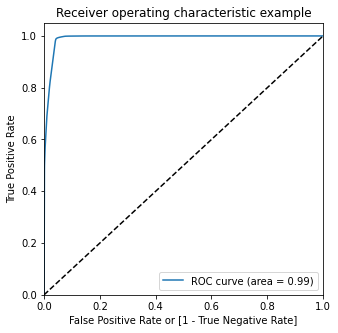

In [ ]:
# Plot the ROC curve
draw_roc(y_train_ad, y_train_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_train_ad, y_train_predicted_proba)
print("ROC-AUC found on the test set for balanced data",ROC_auc_var)

ROC-AUC found on the test set for balanced data 0.9906521946347698


In [ ]:
Train_scr_df_Adasyn['Decission Tree']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]


##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_pred)
print(conf_mat)

[[54340  2524]
 [    9    89]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.9862013272005898
Sensitivity:- 0.9081632653061225
Specificity:- 0.9556133933595948
F1-Score is:- 0.17782426778242677


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.03      0.91      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.96      0.98     56962



In [ ]:
# Predicted probability
y_test_predicted_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_predicted_proba)
auc

0.9547317696071113

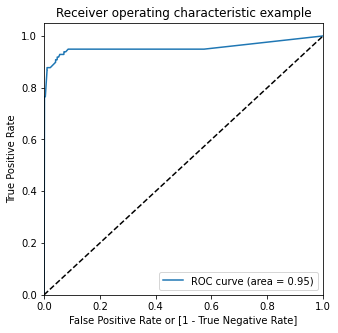

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set for balanced data",ROC_auc_var)

ROC-AUC found on the test set for balanced data 0.9547317696071113


In [ ]:
Test_scr_df_Adasyn['Decision Tree']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]


***Model summary & Comparative Study***


In [ ]:
print("Train Set \n",Train_scr_df_Adasyn)
print("\n\n")
print("Test Set \n",Test_scr_df_Adasyn)

Train Set 
        Metrics  Logistic Regression  Decission Tree
0     Accuracy             0.895780        0.972940
1  Sensitivity             0.882794        0.989380
2  Specificity             0.908763        0.956505
3     F1-Score             0.894397        0.973375
4          ROC             0.965182        0.990652



Test Set 
        Metrics  Logistic Regression  Decision Tree
0     Accuracy             0.986201       0.986201
1  Sensitivity             0.948980       0.908163
2  Specificity             0.907428       0.955613
3     F1-Score             0.177824       0.177824
4          ROC             0.978871       0.954732


### XGBoost

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ad, y_train_ad)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,77.372783,0.631693,0.848438,0.010087,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.984576,0.969500,0.992571,0.982216,0.009566,3,0.998926,0.999319,0.999006,0.999084,0.000170
1,98.285228,0.541187,0.905376,0.057896,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.983086,0.962720,0.992050,0.979285,0.012272,6,0.999005,0.999159,0.998973,0.999046,0.000081
2,102.826854,0.239610,0.853850,0.009298,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.985058,0.965075,0.991292,0.980475,0.011183,5,0.998956,0.999270,0.998826,0.999017,0.000186
3,76.523829,0.068743,0.857730,0.006697,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.992307,0.968114,0.994085,0.984836,0.011846,2,0.999896,0.999931,0.999907,0.999912,0.000015
4,97.660490,0.429156,0.857597,0.006971,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.990967,0.963634,0.991886,0.982162,0.013107,4,0.999912,0.999929,0.999914,0.999918,0.000007
5,102.544248,0.505596,0.858725,0.010423,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.991604,0.972024,0.992360,0.985329,0.009414,1,0.999934,0.999928,0.999911,0.999924,0.000010


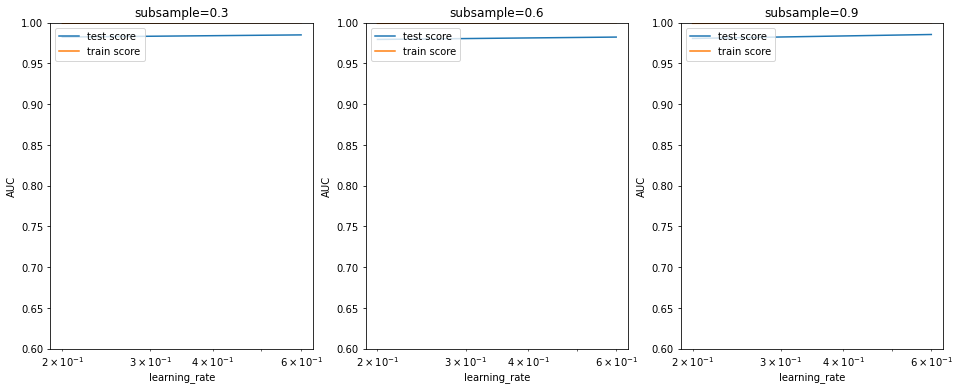

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [ ]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_ad, y_train_ad)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3})

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_predicted = xgb_bal_adasyn_model.predict(X_train_ad)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train_ad, y_train_predicted)
print(conf_mat)

[[219516   7935]
 [  3410 223984]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_train_ad, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train_ad, y_train_predicted)
print("F1-Score is:-", f1_score(y_train_ad, y_train_predicted))

Accuracy:- 0.9750574371489189
Sensitivity:- 0.985004001864605
Specificity:- 0.9651133650764341
F1-Score is:- 0.9753000677098188


In [ ]:
# classification_report
print(classification_report(y_train_ad, y_train_predicted))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97    227451
           1       0.97      0.99      0.98    227394

    accuracy                           0.98    454845
   macro avg       0.98      0.98      0.98    454845
weighted avg       0.98      0.98      0.98    454845



In [ ]:
# Predicted probability
y_train_predicted_proba = xgb_bal_adasyn_model.predict_proba(X_train_ad)[:,1]

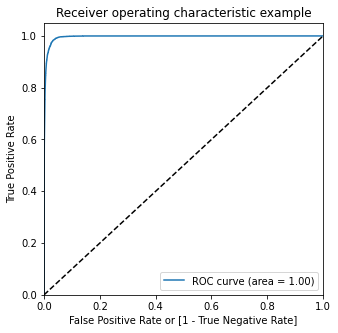

In [ ]:
# Plot the ROC curve
draw_roc(y_train_ad, y_train_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_train_ad, y_train_predicted_proba)
print("ROC-AUC found on the test set for balanced data",ROC_auc_var)

ROC-AUC found on the test set for balanced data 0.9965471307548837


In [ ]:
Train_scr_df_Adasyn['XGBoost']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_pred)
print(conf_mat)

[[54867  1997]
 [    8    90]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.9862013272005898
Sensitivity:- 0.9183673469387755
Specificity:- 0.964881119864941
F1-Score is:- 0.17782426778242677


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [ ]:
# Predicted probability
y_test_predicted_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

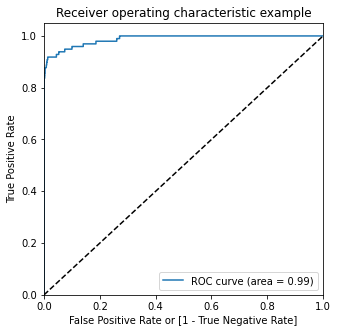

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set for balanced data",ROC_auc_var)

ROC-AUC found on the test set for balanced data 0.9878747573874794


In [ ]:
Test_scr_df_Adasyn['XGBoost']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

***Model summary & Comparative Study***


In [ ]:
print("Train Set \n",Train_scr_df_Adasyn)
print("\n\n")
print("Test Set \n",Test_scr_df_Adasyn)

Train Set 
        Metrics  Logistic Regression  Decission Tree   XGBoost
0     Accuracy             0.895780        0.972940  0.975057
1  Sensitivity             0.882794        0.989380  0.985004
2  Specificity             0.908763        0.956505  0.965113
3     F1-Score             0.894397        0.973375  0.975300
4          ROC             0.965182        0.990652  0.996547



Test Set 
        Metrics  Logistic Regression  Decision Tree   XGBoost
0     Accuracy             0.986201       0.986201  0.986201
1  Sensitivity             0.948980       0.908163  0.918367
2  Specificity             0.907428       0.955613  0.964881
3     F1-Score             0.177824       0.177824  0.177824
4          ROC             0.978871       0.954732  0.987875


### Choosing best model on the balanced data

He we balanced the data with various approach such as Undersampling, Oversampling, SMOTE and Adasy. With every data balancing thechnique we built several models such as Logistic, XGBoost, Decision Tree, and Random Forest.

We can see that almost all the models performed more or less good. But we should be interested in the best model. 

Though the Undersampling technique models performed well, we should keep mind that by doing the undersampling some imformation were lost. Hence, it is better not to consider the undersampling models.

Whereas the SMOTE and Adasyn models performed well. Among those models the simplist model Logistic regression has ROC score 0.99 in the train set and 0.97 on the test set. We can consider the Logistic model as the best model to choose because of the easy interpretation of the models and also the resourse requirements to build the mdoel is lesser than the other heavy models such as Random forest or XGBoost.

Hence, we can conclude that the `Logistic regression model with SMOTE` is the best model for its simlicity and less resource requirement. 

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train_sm, y_train_predicted_proba_log_bal_sm))
fpr, tpr, thresholds = metrics.roc_curve(y_train_sm, y_train_predicted_proba_log_bal_sm)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9897730890293388
Threshold= 0.3505442813743883


It is seen here that the threshold is 0.35, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

## Cost benefit analysis
The several models have been tried up till now for both balanced and imbalanced data. It is observed that most of the models have performed more or less good in terms of ROC score, Precision and Recall.

But for considering the best model a few things should be considered like infrastructure, resources or computational power to run the model selected. For the models such as Random forest, SVM, XGBoost, huge computational power is required and eventually to build that infrastructure the cost of deploying the model increases. On the other hand, the simpler model such as Logistic regression requires less computational resources, so the cost of building the model is less.

It is also required to be considered that for a little change of the ROC score, what amount of monetary loss of gain the bank needs to incur. If the amount is significant, building the complex model may be in demand even though the cost of building the model is high. 


## Summary to the business
For banks with smaller average transaction value, high precision may be recommended because the requirement is to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, human resource may be allocated additionally to verify whether the transaction was done or not, by calling the customer. However, when precision is low, such tasks are a burden because the human resource will be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So, it is mandatory consider the losses if the missed transaction was a high-value fraudulent one.

So here, to save the banks from high-value fraudulent transactions, focus should be on a high recall in order to detect actual fraudulent transactions.

After undergoing several models and the comparative studies pertaining to performance and other factors like time complexities, required computation power etc., it has been seen seen that in the balanced dataset with SMOTE technique the simplest Logistic regression model has good ROC score and also high Recall. Hence, the logistic model is recommended here. It is also interpretable and explainable to the business.

